# First Assignment of Nicolas Leone
### Machine Learning - 2025/2026


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# settings for visualizations
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Part 1: Data Selection

**Chosen Dataset:** Wine Quality Dataset from the UCI Machine Learning Repository

**Source:** https://archive.ics.uci.edu/dataset/186/wine+quality

**Description:** This dataset contains physicochemical properties of Portuguese red and white wines, along with quality scores assigned by experts.

**Dataset Characteristics:**
- **Total Samples:** ~6,500 (1,599 red wines + 4,898 white wines)
- **Features:** 11 continuous physicochemical attributes (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol)
- **Additional Feature:** A categorical `wine_type` column was added to distinguish between red wines (0) and white wines (1)
- **Target Variable:** quality (score from 0 to 10)
- **Task:** Binary Classification (good wine vs not good wine, using threshold quality ≥ 7)

In [2]:
# download wine quality dataset from UCI repository
# dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

# urls for CSV files
url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load datasets (separator ';' for these files)
red_wine = pd.read_csv(url_red, sep=';')
white_wine = pd.read_csv(url_white, sep=';')

# add a column to distinguish wine type
red_wine['wine_type'] = 0  # 0 = red
white_wine['wine_type'] = 1  # 1 = white

# combine the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

print(f"wine quality dataset loaded successfully!")
print(f"total dimensions: {wine_data.shape}")
print(f"- red wines: {len(red_wine)}")
print(f"- white wines: {len(white_wine)}")

wine_data

wine quality dataset loaded successfully!
total dimensions: (6497, 13)
- red wines: 1599
- white wines: 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Part 2: Data Preprocessing

### 2.1 Handling Missing or Noisy Data

This analysis performs a comprehensive check for missing values and inspects the data quality to ensure reliability for model training.

GENERAL DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None

DESCRIPTIVE STATISTICS
       fixed acidi

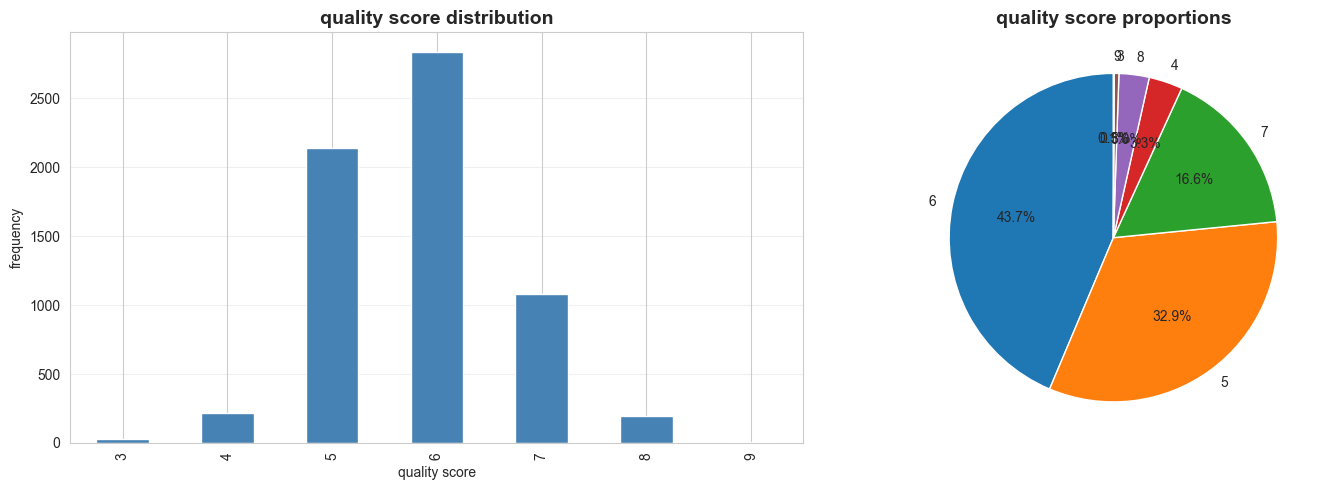

In [3]:
# dataset information
print("=" * 60)
print("GENERAL DATASET INFORMATION")
print("=" * 60)
print(wine_data.info())
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
print(wine_data.describe())

# check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES PER COLUMN")
print("=" * 60)
missing_values = wine_data.isnull().sum()
print(missing_values)
print(f"\ntotal missing values: {missing_values.sum()}")

# target distribution (quality)
print("=" * 60)
print("TARGET DISTRIBUTION (QUALITY)")
print("=" * 60)
print(wine_data['quality'].value_counts().sort_index())

# visualization of quality distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# barplot
wine_data['quality'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('quality score distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('quality score')
axes[0].set_ylabel('frequency')
axes[0].grid(axis='y', alpha=0.3)

# pie chart
wine_data['quality'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('quality score proportions', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

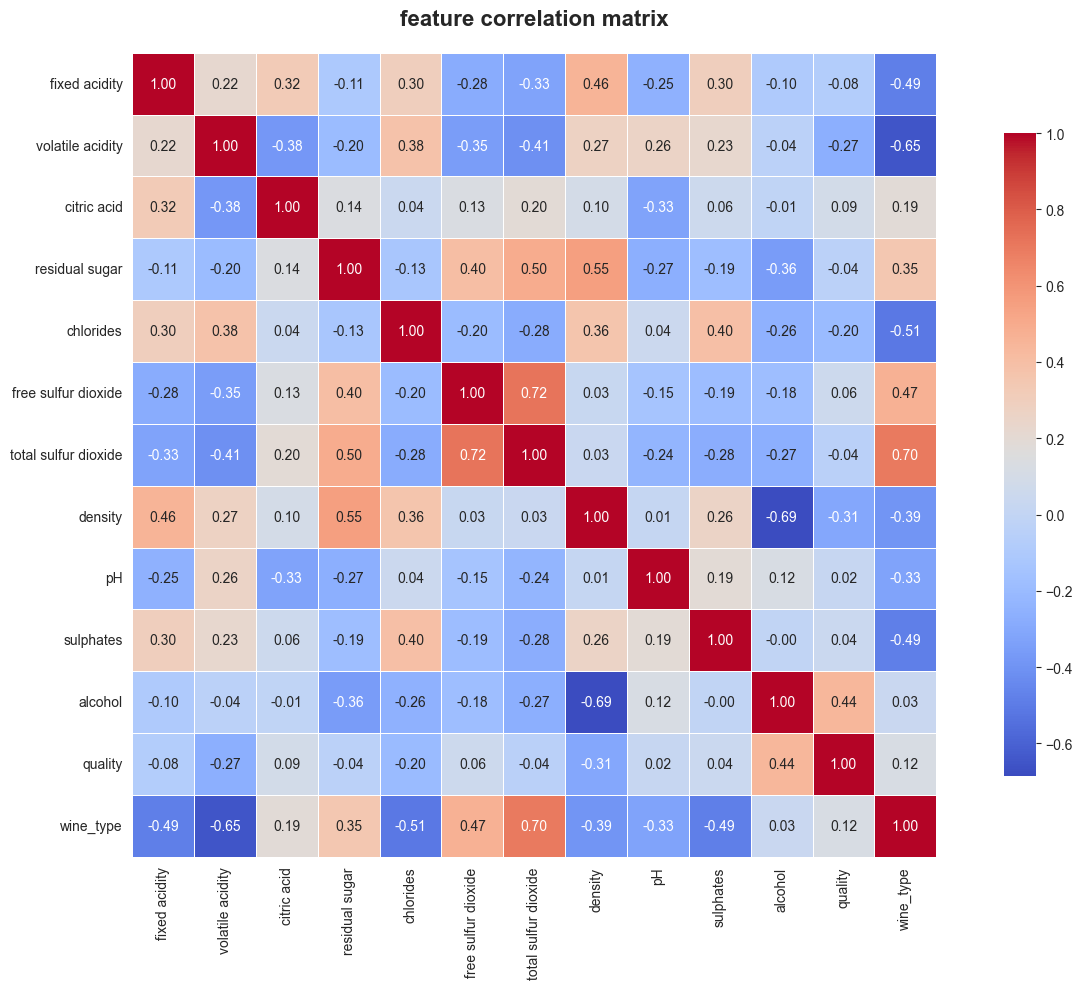


CORRELATIONS WITH TARGET (QUALITY)
quality                 1.000000
alcohol                 0.444319
wine_type               0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [4]:
# correlation matrix (only for numeric features)
plt.figure(figsize=(14, 10))
# select only numeric columns for correlation
numeric_data = wine_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('feature correlation matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# print the strongest correlations with quality
print("\n" + "=" * 60)
print("CORRELATIONS WITH TARGET (QUALITY)")
print("=" * 60)
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_corr)

### 2.2 Target Variable Binarization

For the binary classification task, the multi-class quality score (0-10) is transformed into a binary target:
- **Class 1 (Good Wine):** quality ≥ 7
- **Class 0 (Not Good Wine):** quality < 7

This threshold is commonly used in wine quality studies to distinguish premium wines from regular ones.

In [5]:
# target binarization for binary classification
# threshold: quality >= 7 → "good wine" (1), quality < 7 → "not good" (0)
QUALITY_THRESHOLD = 7

y = wine_data['quality']
y_binary = (y >= QUALITY_THRESHOLD).astype(int)

print("=" * 60)
print("TARGET BINARIZATION")
print("=" * 60)
print(f"chosen threshold: quality >= {QUALITY_THRESHOLD}")
print(f"\nbinary class distribution:")
print(y_binary.value_counts())
print(f"\nproportions:")
print(y_binary.value_counts(normalize=True))

TARGET BINARIZATION
chosen threshold: quality >= 7

binary class distribution:
quality
0    5220
1    1277
Name: count, dtype: int64

proportions:
quality
0    0.803448
1    0.196552
Name: proportion, dtype: float64


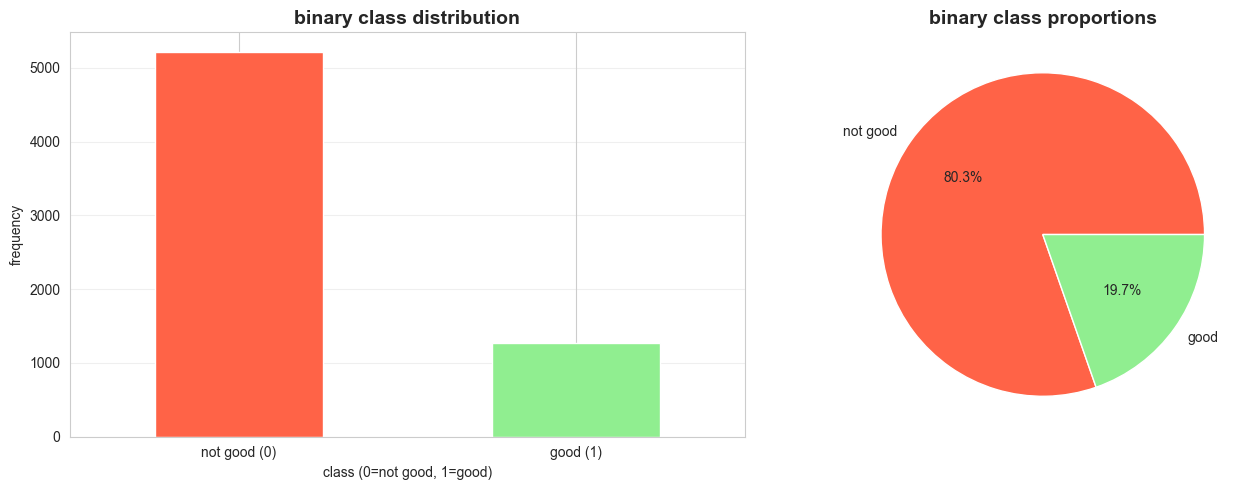

In [6]:
# visualization of binary class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# barplot
y_binary.value_counts().plot(kind='bar', ax=axes[0], color=['tomato', 'lightgreen'])
axes[0].set_title('binary class distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('class (0=not good, 1=good)')
axes[0].set_ylabel('frequency')
axes[0].set_xticklabels(['not good (0)', 'good (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# pie chart
y_binary.value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                              colors=['tomato', 'lightgreen'], labels=['not good', 'good'])
axes[1].set_title('binary class proportions', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 2.3 Data Splitting into Training, Validation, and Test Sets

The dataset is divided into three subsets using **stratified splitting** to maintain class proportions:
- **Training Set (70%):** Used for model training
- **Validation Set (15%):** Used for hyperparameter tuning via cross-validation
- **Test Set (15%):** Used for final model evaluation on unseen data

Stratification ensures that the class imbalance (~80% class 0, ~20% class 1) is preserved across all splits.

In [7]:
# separate features and target
# features: all columns except 'quality'
X = wine_data.drop('quality', axis=1)

print("=" * 60)
print("FEATURE AND TARGET SEPARATION")
print("=" * 60)
print(f"features shape (X): {X.shape}")
print(f"target shape (y_binary): {y_binary.shape}")
print(f"\nfeatures in dataset:")
print(list(X.columns))

FEATURE AND TARGET SEPARATION
features shape (X): (6497, 12)
target shape (y_binary): (6497,)

features in dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']


In [8]:
# stratified split: first separate train+val (85%) from test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_binary, 
    test_size=0.15, 
    random_state=RANDOM_SEED, 
    stratify=y_binary
)

# then separate train (70% of total) from validation (15% of total)
# 70/85 ≈ 0.824 to get 70% of the original dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.176,  # 15/85 ≈ 0.176
    random_state=RANDOM_SEED, 
    stratify=y_temp
)

print("\n" + "=" * 60)
print("DATASET SPLIT")
print("=" * 60)
print(f"total dataset: {len(X)} samples")
print(f"\ntraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# verify stratification
print("\n" + "=" * 60)
print("CLASS STRATIFICATION VERIFICATION")
print("=" * 60)
print("proportions of class 1 (good wine):")
print(f"- complete dataset: {y_binary.mean():.3f}")
print(f"- training set: {y_train.mean():.3f}")
print(f"- validation set: {y_val.mean():.3f}")
print(f"- test set: {y_test.mean():.3f}")


DATASET SPLIT
total dataset: 6497 samples

training set: 4550 samples (70.0%)
validation set: 972 samples (15.0%)
test set: 975 samples (15.0%)

CLASS STRATIFICATION VERIFICATION
proportions of class 1 (good wine):
- complete dataset: 0.197
- training set: 0.196
- validation set: 0.197
- test set: 0.197


### 2.4 Feature Standardization

**Standardization** (z-score normalization) is applied to rescale continuous features to have mean = 0 and standard deviation = 1. This is crucial for distance-based algorithms (e.g., SVM, Logistic Regression) that are sensitive to feature scales.

**Important Notes:**
1. The `wine_type` feature is **excluded** from standardization as it is categorical (0=red, 1=white)
2. The scaler is **fitted only on the training set** and then applied to validation and test sets to avoid data leakage
3. The implementation uses `sklearn.preprocessing.StandardScaler` which handles edge cases (e.g., zero variance features) correctly

In [9]:
# standardization with StandardScaler (z-score)
# IMPORTANT: fit only on training set, then transform on val and test (to avoid data leakage!)
# exclude 'wine_type' column as it is categorical (0=red, 1=white)

# identify continuous features (exclude categorical 'wine_type')
continuous_features = X_train.columns.drop('wine_type')

# initialize scaler
scaler = StandardScaler()

# fit on training set (continuous features only)
X_train_scaled = X_train.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# transform validation and test sets (using parameters from training)
X_val_scaled = X_val.copy()
X_val_scaled[continuous_features] = scaler.transform(X_val[continuous_features])

X_test_scaled = X_test.copy()
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

print("=" * 60)
print("STANDARDIZATION COMPLETED")
print("=" * 60)
print("StandardScaler applied to continuous features only!")
print(f"continuous features standardized: {list(continuous_features)}")
print(f"categorical feature preserved: wine_type")

print(f"\nstandardization verification on training set (continuous features):")
print(f"mean: {X_train_scaled[continuous_features].mean().mean():.6f} (should be ~0)")
print(f"std: {X_train_scaled[continuous_features].std().mean():.6f} (should be ~1)")

print("\nfirst rows of standardized training set:")
display(X_train_scaled.head())

STANDARDIZATION COMPLETED
StandardScaler applied to continuous features only!
continuous features standardized: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
categorical feature preserved: wine_type

standardization verification on training set (continuous features):
mean: -0.000000 (should be ~0)
std: 1.000110 (should be ~1)

first rows of standardized training set:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
2875,0.603708,-0.728275,0.691503,1.938023,-0.337980,0.827734,0.835469,1.862903,-0.049967,1.071691,-1.583896,1
353,4.819048,1.144339,3.243891,-0.125747,1.781676,-0.422020,-0.681148,2.358071,-0.235713,1.609287,2.061339,0
201,1.216848,0.177829,1.105403,-0.694336,1.140201,0.486892,0.518037,0.938589,-1.102524,3.356473,-1.003972,0
2243,-0.622573,-0.607461,-0.205283,1.264139,-0.142749,0.089243,0.888374,0.707510,0.569183,-0.541096,-0.838280,1
5895,-0.239361,-0.728275,0.001668,0.084842,-0.421651,-0.592441,0.059525,-0.560121,-0.297628,0.130899,0.570107,1


## Part 3: Model Implementation and Training

In this section, multiple classification algorithms are implemented and trained for binary wine quality prediction. For each model, hyperparameter tuning is performed using **GridSearchCV** with cross-validation on the training set, and performance is validated on the validation set.

The following algorithms are implemented:
1. **Gaussian Naive Bayes** - Probabilistic classifier assuming Gaussian distribution of features
2. **Logistic Regression** - Linear model with logistic function for binary classification
3. **Decision Tree** - Non-parametric tree-based classifier
4. **Random Forest** - Ensemble of decision trees
5. **Support Vector Machine (Linear)** - Linear kernel SVM
6. **Support Vector Machine (RBF)** - Radial Basis Function kernel SVM

In [10]:
# import classifiers for model implementation
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("=" * 60)
print("CLASSIFIERS IMPORTED SUCCESSFULLY")
print("=" * 60)
print("available models:")
print("- Gaussian Naive Bayes (GaussianNB)")
print("- Logistic Regression")
print("- Decision Tree Classifier")
print("- Random Forest Classifier")
print("- Support Vector Machine (SVC)")

CLASSIFIERS IMPORTED SUCCESSFULLY
available models:
- Gaussian Naive Bayes (GaussianNB)
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVC)


### 3.1 Gaussian Naive Bayes

**Gaussian Naive Bayes** is a probabilistic classifier based on Bayes' theorem with the assumption that features follow a Gaussian (normal) distribution within each class. It is particularly suitable for continuous features like the physicochemical wine properties.

**Advantages:**
- Simple and fast to train
- Works well with small datasets
- Naturally handles continuous features

**Hyperparameters to tune:**
- `var_smoothing`: Portion of the largest variance added to variances for calculation stability

In [11]:
# gaussian naive bayes with hyperparameter tuning
# hyperparameter: var_smoothing (portion of largest variance added for stability)

# define parameter grid for GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(-10, -8, 10)  # explore range from 1e-10 to 1e-8
}

# initialize Gaussian Naive Bayes
gnb = GaussianNB()

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("GAUSSIAN NAIVE BAYES - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid: {param_grid_nb}")
print("performing 5-fold cross-validation on training set...")

start_time = time.time()

grid_search_nb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid_nb,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_nb.fit(X_train_scaled, y_train)

training_time_nb = time.time() - start_time

# extract best model and parameters
best_nb = grid_search_nb.best_estimator_
best_params_nb = grid_search_nb.best_params_
best_cv_score_nb = grid_search_nb.best_score_

print("\n" + "=" * 60)
print("GAUSSIAN NAIVE BAYES - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_nb}")
print(f"best cross-validation F1 score: {best_cv_score_nb:.4f}")
print(f"training time: {training_time_nb:.2f} seconds")

# predictions on training and validation sets
y_train_pred_nb = best_nb.predict(X_train_scaled)
y_val_pred_nb = best_nb.predict(X_val_scaled)

# evaluate performance on training set
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
train_f1_nb = f1_score(y_train, y_train_pred_nb)

# evaluate performance on validation set
val_acc_nb = accuracy_score(y_val, y_val_pred_nb)
val_precision_nb = precision_score(y_val, y_val_pred_nb)
val_recall_nb = recall_score(y_val, y_val_pred_nb)
val_f1_nb = f1_score(y_val, y_val_pred_nb)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_nb:.4f}")
print(f"  - F1 score: {train_f1_nb:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_nb:.4f}")
print(f"  - precision: {val_precision_nb:.4f}")
print(f"  - recall: {val_recall_nb:.4f}")
print(f"  - F1 score: {val_f1_nb:.4f}")

GAUSSIAN NAIVE BAYES - HYPERPARAMETER TUNING
parameter grid: {'var_smoothing': array([1.00000000e-10, 1.66810054e-10, 2.78255940e-10, 4.64158883e-10,
       7.74263683e-10, 1.29154967e-09, 2.15443469e-09, 3.59381366e-09,
       5.99484250e-09, 1.00000000e-08])}
performing 5-fold cross-validation on training set...

GAUSSIAN NAIVE BAYES - RESULTS
best hyperparameters: {'var_smoothing': np.float64(1e-10)}
best cross-validation F1 score: 0.4854
training time: 1.40 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.7237
  - F1 score: 0.4867

validation set:
  - accuracy: 0.7335
  - precision: 0.3957
  - recall: 0.6754
  - F1 score: 0.4990

GAUSSIAN NAIVE BAYES - RESULTS
best hyperparameters: {'var_smoothing': np.float64(1e-10)}
best cross-validation F1 score: 0.4854
training time: 1.40 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.7237
  - F1 score: 0.4867

validation set:
  - accuracy: 0.7335
  - precision: 0.3957
  - recall: 0.6754
  - F1 score: 0.4990


### 3.2 Logistic Regression

**Logistic Regression** is a linear classification model that uses the logistic (sigmoid) function to predict class probabilities. Despite its name, it is a classification algorithm suitable for binary tasks. It assumes a linear decision boundary between classes.

**Advantages:**
- Simple and interpretable
- Provides probability estimates
- Works well with linearly separable data
- Less prone to overfitting with regularization

**Hyperparameters to tune:**
- `C`: Inverse of regularization strength (smaller values = stronger regularization)
- `penalty`: Type of regularization ('l1', 'l2', 'elasticnet')
- `solver`: Optimization algorithm ('lbfgs', 'liblinear', 'saga', etc.)
- `max_iter`: Maximum number of iterations for convergence

In [12]:
# logistic regression with hyperparameter tuning
# hyperparameters: C (regularization), penalty, solver, max_iter

# define parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization strength (inverse)
    'penalty': ['l2'],  # L2 regularization (ridge)
    'solver': ['lbfgs', 'liblinear', 'saga'],  # optimization algorithms
    'max_iter': [200, 500, 1000]  # maximum iterations for convergence
}

# initialize Logistic Regression
lr = LogisticRegression(random_state=RANDOM_SEED)

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("LOGISTIC REGRESSION - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid:")
print(f"  - C: {param_grid_lr['C']}")
print(f"  - penalty: {param_grid_lr['penalty']}")
print(f"  - solver: {param_grid_lr['solver']}")
print(f"  - max_iter: {param_grid_lr['max_iter']}")
print("performing 5-fold cross-validation on training set...")

start_time = time.time()

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_lr.fit(X_train_scaled, y_train)

training_time_lr = time.time() - start_time

# extract best model and parameters
best_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_
best_cv_score_lr = grid_search_lr.best_score_

print("\n" + "=" * 60)
print("LOGISTIC REGRESSION - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_lr}")
print(f"best cross-validation F1 score: {best_cv_score_lr:.4f}")
print(f"training time: {training_time_lr:.2f} seconds")

# predictions on training and validation sets
y_train_pred_lr = best_lr.predict(X_train_scaled)
y_val_pred_lr = best_lr.predict(X_val_scaled)

# evaluate performance on training set
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)

# evaluate performance on validation set
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
val_precision_lr = precision_score(y_val, y_val_pred_lr)
val_recall_lr = recall_score(y_val, y_val_pred_lr)
val_f1_lr = f1_score(y_val, y_val_pred_lr)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_lr:.4f}")
print(f"  - F1 score: {train_f1_lr:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_lr:.4f}")
print(f"  - precision: {val_precision_lr:.4f}")
print(f"  - recall: {val_recall_lr:.4f}")
print(f"  - F1 score: {val_f1_lr:.4f}")

LOGISTIC REGRESSION - HYPERPARAMETER TUNING
parameter grid:
  - C: [0.001, 0.01, 0.1, 1, 10, 100]
  - penalty: ['l2']
  - solver: ['lbfgs', 'liblinear', 'saga']
  - max_iter: [200, 500, 1000]
performing 5-fold cross-validation on training set...

LOGISTIC REGRESSION - RESULTS
best hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
best cross-validation F1 score: 0.3654
training time: 0.58 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.8207
  - F1 score: 0.3799

validation set:
  - accuracy: 0.8189
  - precision: 0.5974
  - recall: 0.2408
  - F1 score: 0.3433

LOGISTIC REGRESSION - RESULTS
best hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
best cross-validation F1 score: 0.3654
training time: 0.58 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.8207
  - F1 score: 0.3799

validation set:
  - accuracy: 0.8189
  - precision: 0.5974
  - recall: 0.2408
  - F1 score: 0.3433


### 3.3 Decision Tree

**Decision Tree** is a non-parametric supervised learning algorithm that creates a tree-like model of decisions. It splits the data recursively based on feature values to maximize information gain or minimize impurity at each node.

**Advantages:**
- Easy to understand and interpret
- Requires little data preprocessing
- Can handle both numerical and categorical data
- Captures non-linear relationships

**Disadvantages:**
- Prone to overfitting (especially with deep trees)
- Can be unstable (small changes in data can lead to different trees)

**Hyperparameters to tune:**
- `max_depth`: Maximum depth of the tree
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required to be at a leaf node
- `criterion`: Function to measure split quality ('gini' or 'entropy')

In [13]:
# decision tree with hyperparameter tuning
# hyperparameters: max_depth, min_samples_split, min_samples_leaf, criterion

# define parameter grid for GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, None],  # tree depth (None = unlimited)
    'min_samples_split': [2, 5, 10, 20],  # min samples to split node
    'min_samples_leaf': [1, 2, 4, 8],  # min samples in leaf node
    'criterion': ['gini', 'entropy']  # split quality measure
}

# initialize Decision Tree
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("DECISION TREE - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid:")
print(f"  - max_depth: {param_grid_dt['max_depth']}")
print(f"  - min_samples_split: {param_grid_dt['min_samples_split']}")
print(f"  - min_samples_leaf: {param_grid_dt['min_samples_leaf']}")
print(f"  - criterion: {param_grid_dt['criterion']}")
print("performing 5-fold cross-validation on training set...")

start_time = time.time()

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_dt.fit(X_train_scaled, y_train)

training_time_dt = time.time() - start_time

# extract best model and parameters
best_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_
best_cv_score_dt = grid_search_dt.best_score_

print("\n" + "=" * 60)
print("DECISION TREE - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_dt}")
print(f"best cross-validation F1 score: {best_cv_score_dt:.4f}")
print(f"training time: {training_time_dt:.2f} seconds")

# predictions on training and validation sets
y_train_pred_dt = best_dt.predict(X_train_scaled)
y_val_pred_dt = best_dt.predict(X_val_scaled)

# evaluate performance on training set
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)

# evaluate performance on validation set
val_acc_dt = accuracy_score(y_val, y_val_pred_dt)
val_precision_dt = precision_score(y_val, y_val_pred_dt)
val_recall_dt = recall_score(y_val, y_val_pred_dt)
val_f1_dt = f1_score(y_val, y_val_pred_dt)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_dt:.4f}")
print(f"  - F1 score: {train_f1_dt:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_dt:.4f}")
print(f"  - precision: {val_precision_dt:.4f}")
print(f"  - recall: {val_recall_dt:.4f}")
print(f"  - F1 score: {val_f1_dt:.4f}")

DECISION TREE - HYPERPARAMETER TUNING
parameter grid:
  - max_depth: [3, 5, 7, 10, 15, None]
  - min_samples_split: [2, 5, 10, 20]
  - min_samples_leaf: [1, 2, 4, 8]
  - criterion: ['gini', 'entropy']
performing 5-fold cross-validation on training set...

DECISION TREE - RESULTS
best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best cross-validation F1 score: 0.5720
training time: 1.33 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 1.0000
  - F1 score: 1.0000

validation set:
  - accuracy: 0.8519
  - precision: 0.6205
  - recall: 0.6335
  - F1 score: 0.6269

DECISION TREE - RESULTS
best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best cross-validation F1 score: 0.5720
training time: 1.33 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 1.0000
  - F1 score: 1.0000

validation set:
  - accuracy: 0.8519
  - precision: 0.6205
  - recall: 0.6335
  

### 3.4 Random Forest

**Random Forest** is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees. It reduces overfitting by averaging multiple trees trained on different subsets of data.

**Advantages:**
- Reduces overfitting compared to single decision trees
- Handles high-dimensional data well
- Provides feature importance estimates
- Robust to outliers and noise

**Hyperparameters to tune:**
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `min_samples_split`: Minimum samples required to split an internal node
- `min_samples_leaf`: Minimum samples required to be at a leaf node
- `max_features`: Number of features to consider when looking for the best split

In [14]:
# random forest with hyperparameter tuning
# hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features

# define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # number of trees in forest
    'max_depth': [5, 10, 15, None],  # maximum tree depth
    'min_samples_split': [2, 5, 10],  # min samples to split node
    'min_samples_leaf': [1, 2, 4],  # min samples in leaf node
    'max_features': ['sqrt', 'log2', None]  # features to consider for best split
}

# initialize Random Forest
rf = RandomForestClassifier(random_state=RANDOM_SEED)

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("RANDOM FOREST - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid:")
print(f"  - n_estimators: {param_grid_rf['n_estimators']}")
print(f"  - max_depth: {param_grid_rf['max_depth']}")
print(f"  - min_samples_split: {param_grid_rf['min_samples_split']}")
print(f"  - min_samples_leaf: {param_grid_rf['min_samples_leaf']}")
print(f"  - max_features: {param_grid_rf['max_features']}")
print("performing 5-fold cross-validation on training set...")

start_time = time.time()

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_rf.fit(X_train_scaled, y_train)

training_time_rf = time.time() - start_time

# extract best model and parameters
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_cv_score_rf = grid_search_rf.best_score_

print("\n" + "=" * 60)
print("RANDOM FOREST - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_rf}")
print(f"best cross-validation F1 score: {best_cv_score_rf:.4f}")
print(f"training time: {training_time_rf:.2f} seconds")

# predictions on training and validation sets
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_val_pred_rf = best_rf.predict(X_val_scaled)

# evaluate performance on training set
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# evaluate performance on validation set
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
val_precision_rf = precision_score(y_val, y_val_pred_rf)
val_recall_rf = recall_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_rf:.4f}")
print(f"  - F1 score: {train_f1_rf:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_rf:.4f}")
print(f"  - precision: {val_precision_rf:.4f}")
print(f"  - recall: {val_recall_rf:.4f}")
print(f"  - F1 score: {val_f1_rf:.4f}")

RANDOM FOREST - HYPERPARAMETER TUNING
parameter grid:
  - n_estimators: [50, 100, 200]
  - max_depth: [5, 10, 15, None]
  - min_samples_split: [2, 5, 10]
  - min_samples_leaf: [1, 2, 4]
  - max_features: ['sqrt', 'log2', None]
performing 5-fold cross-validation on training set...

RANDOM FOREST - RESULTS
best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
best cross-validation F1 score: 0.6479
training time: 77.18 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.9974
  - F1 score: 0.9932

validation set:
  - accuracy: 0.8879
  - precision: 0.7929
  - recall: 0.5812
  - F1 score: 0.6707

RANDOM FOREST - RESULTS
best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
best cross-validation F1 score: 0.6479
training time: 77.18 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.9974
  - F1 score: 0.9932

validation set

### 3.5 Support Vector Machine (Linear Kernel)

**Support Vector Machine (SVM) with Linear Kernel** finds the optimal hyperplane that maximizes the margin between classes in the feature space. The linear kernel is suitable when data is linearly separable or approximately so.

**Advantages:**
- Effective in high-dimensional spaces
- Memory efficient (uses support vectors only)
- Works well when classes are clearly separated
- Robust to overfitting with proper regularization

**Hyperparameters to tune:**
- `C`: Regularization parameter (controls trade-off between margin maximization and classification errors)
- `class_weight`: Weights associated with classes (useful for imbalanced datasets)

In [15]:
# support vector machine (linear kernel) with hyperparameter tuning
# hyperparameters: C (regularization), class_weight

# define parameter grid for GridSearchCV
param_grid_svm_linear = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'class_weight': [None, 'balanced']  # handle class imbalance
}

# initialize SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=RANDOM_SEED)

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("SVM (LINEAR KERNEL) - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid:")
print(f"  - C: {param_grid_svm_linear['C']}")
print(f"  - class_weight: {param_grid_svm_linear['class_weight']}")
print("performing 5-fold cross-validation on training set...")

start_time = time.time()

grid_search_svm_linear = GridSearchCV(
    estimator=svm_linear,
    param_grid=param_grid_svm_linear,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_svm_linear.fit(X_train_scaled, y_train)

training_time_svm_linear = time.time() - start_time

# extract best model and parameters
best_svm_linear = grid_search_svm_linear.best_estimator_
best_params_svm_linear = grid_search_svm_linear.best_params_
best_cv_score_svm_linear = grid_search_svm_linear.best_score_

print("\n" + "=" * 60)
print("SVM (LINEAR KERNEL) - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_svm_linear}")
print(f"best cross-validation F1 score: {best_cv_score_svm_linear:.4f}")
print(f"training time: {training_time_svm_linear:.2f} seconds")

# predictions on training and validation sets
y_train_pred_svm_linear = best_svm_linear.predict(X_train_scaled)
y_val_pred_svm_linear = best_svm_linear.predict(X_val_scaled)

# evaluate performance on training set
train_acc_svm_linear = accuracy_score(y_train, y_train_pred_svm_linear)
train_f1_svm_linear = f1_score(y_train, y_train_pred_svm_linear)

# evaluate performance on validation set
val_acc_svm_linear = accuracy_score(y_val, y_val_pred_svm_linear)
val_precision_svm_linear = precision_score(y_val, y_val_pred_svm_linear)
val_recall_svm_linear = recall_score(y_val, y_val_pred_svm_linear)
val_f1_svm_linear = f1_score(y_val, y_val_pred_svm_linear)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_svm_linear:.4f}")
print(f"  - F1 score: {train_f1_svm_linear:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_svm_linear:.4f}")
print(f"  - precision: {val_precision_svm_linear:.4f}")
print(f"  - recall: {val_recall_svm_linear:.4f}")
print(f"  - F1 score: {val_f1_svm_linear:.4f}")

SVM (LINEAR KERNEL) - HYPERPARAMETER TUNING
parameter grid:
  - C: [0.001, 0.01, 0.1, 1, 10, 100]
  - class_weight: [None, 'balanced']
performing 5-fold cross-validation on training set...

SVM (LINEAR KERNEL) - RESULTS
best hyperparameters: {'C': 1, 'class_weight': 'balanced'}
best cross-validation F1 score: 0.5286
training time: 166.87 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.7248
  - F1 score: 0.5300

validation set:
  - accuracy: 0.7366
  - precision: 0.4110
  - recall: 0.7853
  - F1 score: 0.5396

SVM (LINEAR KERNEL) - RESULTS
best hyperparameters: {'C': 1, 'class_weight': 'balanced'}
best cross-validation F1 score: 0.5286
training time: 166.87 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.7248
  - F1 score: 0.5300

validation set:
  - accuracy: 0.7366
  - precision: 0.4110
  - recall: 0.7853
  - F1 score: 0.5396


### 3.6 Support Vector Machine (RBF Kernel)

**Support Vector Machine (SVM) with RBF (Radial Basis Function) Kernel** maps input features into a higher-dimensional space using a Gaussian kernel, allowing it to find non-linear decision boundaries. This is particularly useful when data is not linearly separable.

**Advantages:**
- Can model complex non-linear relationships
- Effective in high-dimensional spaces
- Robust with proper regularization
- Works well with standardized features

**Disadvantages:**
- More computationally expensive than linear kernel
- Requires careful tuning of hyperparameters
- Can overfit with improper parameter selection

**Hyperparameters to tune:**
- `C`: Regularization parameter (controls trade-off between margin and misclassification)
- `gamma`: Kernel coefficient (controls influence of individual training samples)
- `class_weight`: Weights associated with classes (useful for imbalanced datasets)

In [16]:
# support vector machine (RBF kernel) with hyperparameter tuning
# hyperparameters: C (regularization), gamma (kernel coefficient), class_weight

# define parameter grid for GridSearchCV
param_grid_svm_rbf = {
    'C': [0.1, 1, 10, 100],  # regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # kernel coefficient
    'class_weight': [None, 'balanced']  # handle class imbalance
}

# initialize SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=RANDOM_SEED)

# perform grid search with 5-fold cross-validation on training set
print("=" * 60)
print("SVM (RBF KERNEL) - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"parameter grid:")
print(f"  - C: {param_grid_svm_rbf['C']}")
print(f"  - gamma: {param_grid_svm_rbf['gamma']}")
print(f"  - class_weight: {param_grid_svm_rbf['class_weight']}")
print("performing 5-fold cross-validation on training set...")
print("(this may take longer due to non-linear kernel computation)")

start_time = time.time()

grid_search_svm_rbf = GridSearchCV(
    estimator=svm_rbf,
    param_grid=param_grid_svm_rbf,
    cv=5,  # 5-fold stratified cross-validation
    scoring='f1',  # optimize F1 score (good for imbalanced classes)
    n_jobs=-1  # use all available processors
)

# fit grid search on training data
grid_search_svm_rbf.fit(X_train_scaled, y_train)

training_time_svm_rbf = time.time() - start_time

# extract best model and parameters
best_svm_rbf = grid_search_svm_rbf.best_estimator_
best_params_svm_rbf = grid_search_svm_rbf.best_params_
best_cv_score_svm_rbf = grid_search_svm_rbf.best_score_

print("\n" + "=" * 60)
print("SVM (RBF KERNEL) - RESULTS")
print("=" * 60)
print(f"best hyperparameters: {best_params_svm_rbf}")
print(f"best cross-validation F1 score: {best_cv_score_svm_rbf:.4f}")
print(f"training time: {training_time_svm_rbf:.2f} seconds")

# predictions on training and validation sets
y_train_pred_svm_rbf = best_svm_rbf.predict(X_train_scaled)
y_val_pred_svm_rbf = best_svm_rbf.predict(X_val_scaled)

# evaluate performance on training set
train_acc_svm_rbf = accuracy_score(y_train, y_train_pred_svm_rbf)
train_f1_svm_rbf = f1_score(y_train, y_train_pred_svm_rbf)

# evaluate performance on validation set
val_acc_svm_rbf = accuracy_score(y_val, y_val_pred_svm_rbf)
val_precision_svm_rbf = precision_score(y_val, y_val_pred_svm_rbf)
val_recall_svm_rbf = recall_score(y_val, y_val_pred_svm_rbf)
val_f1_svm_rbf = f1_score(y_val, y_val_pred_svm_rbf)

print("\n" + "=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"training set:")
print(f"  - accuracy: {train_acc_svm_rbf:.4f}")
print(f"  - F1 score: {train_f1_svm_rbf:.4f}")
print(f"\nvalidation set:")
print(f"  - accuracy: {val_acc_svm_rbf:.4f}")
print(f"  - precision: {val_precision_svm_rbf:.4f}")
print(f"  - recall: {val_recall_svm_rbf:.4f}")
print(f"  - F1 score: {val_f1_svm_rbf:.4f}")

SVM (RBF KERNEL) - HYPERPARAMETER TUNING
parameter grid:
  - C: [0.1, 1, 10, 100]
  - gamma: ['scale', 'auto', 0.001, 0.01, 0.1]
  - class_weight: [None, 'balanced']
performing 5-fold cross-validation on training set...
(this may take longer due to non-linear kernel computation)

SVM (RBF KERNEL) - RESULTS
best hyperparameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1}
best cross-validation F1 score: 0.5933
training time: 3.99 seconds

SVM (RBF KERNEL) - RESULTS
best hyperparameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 0.1}
best cross-validation F1 score: 0.5933
training time: 3.99 seconds

PERFORMANCE METRICS
training set:
  - accuracy: 0.9024
  - F1 score: 0.7982

validation set:
  - accuracy: 0.8148
  - precision: 0.5201
  - recall: 0.7435
  - F1 score: 0.6121

PERFORMANCE METRICS
training set:
  - accuracy: 0.9024
  - F1 score: 0.7982

validation set:
  - accuracy: 0.8148
  - precision: 0.5201
  - recall: 0.7435
  - F1 score: 0.6121


## Part 4: Evaluation

In this section, the performance of all trained models is evaluated following the standard evaluation metrics for classification tasks. The evaluation is conducted on the **test set** to assess generalization capability on completely unseen data.

The evaluation follows this structured approach:
1. **Accuracy, Precision, Recall, F1 Score** - Core classification metrics
2. **Confusion Matrix** - Detailed error analysis
3. **ROC and AUC** - Threshold-independent performance assessment
4. **Training vs. Validation Performance** - Overfitting/underfitting detection
5. **Computational Cost and Training Time** - Efficiency analysis (optional)

This comprehensive evaluation provides insights into which models perform best for binary wine quality classification.

In [17]:
# import additional libraries for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

print("=" * 60)
print("EVALUATION LIBRARIES IMPORTED")
print("=" * 60)
print("additional evaluation tools:")
print("- confusion_matrix, ConfusionMatrixDisplay")
print("- roc_curve, auc, roc_auc_score")
print("- classification_report")

EVALUATION LIBRARIES IMPORTED
additional evaluation tools:
- confusion_matrix, ConfusionMatrixDisplay
- roc_curve, auc, roc_auc_score
- classification_report


### 4.1 Accuracy, Precision, Recall, F1 Score

This section evaluates all models using the fundamental classification metrics:
- **Accuracy**: Overall correctness of predictions
- **Precision**: Ability to avoid false positives (important for wine quality to avoid mislabeling poor wines as good)
- **Recall**: Ability to identify all good wines (sensitivity)
- **F1 Score**: Harmonic mean of precision and recall (primary optimization metric used during training)

These metrics are computed on the test set to assess true generalization performance.

In [18]:
# generate predictions on test set for all models
print("=" * 60)
print("COMPUTING ACCURACY, PRECISION, RECALL, F1 SCORE")
print("=" * 60)

# predictions for each model on test set
y_test_pred_nb = best_nb.predict(X_test_scaled)
y_test_pred_lr = best_lr.predict(X_test_scaled)
y_test_pred_dt = best_dt.predict(X_test_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)
y_test_pred_svm_linear = best_svm_linear.predict(X_test_scaled)
y_test_pred_svm_rbf = best_svm_rbf.predict(X_test_scaled)

# compute test set metrics for all models
test_metrics = {}

# Gaussian Naive Bayes
test_metrics['Gaussian Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_nb),
    'Precision': precision_score(y_test, y_test_pred_nb),
    'Recall': recall_score(y_test, y_test_pred_nb),
    'F1 Score': f1_score(y_test, y_test_pred_nb)
}

# Logistic Regression
test_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_lr),
    'Precision': precision_score(y_test, y_test_pred_lr),
    'Recall': recall_score(y_test, y_test_pred_lr),
    'F1 Score': f1_score(y_test, y_test_pred_lr)
}

# Decision Tree
test_metrics['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_dt),
    'Precision': precision_score(y_test, y_test_pred_dt),
    'Recall': recall_score(y_test, y_test_pred_dt),
    'F1 Score': f1_score(y_test, y_test_pred_dt)
}

# Random Forest
test_metrics['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_rf),
    'Precision': precision_score(y_test, y_test_pred_rf),
    'Recall': recall_score(y_test, y_test_pred_rf),
    'F1 Score': f1_score(y_test, y_test_pred_rf)
}

# SVM Linear
test_metrics['SVM Linear'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_svm_linear),
    'Precision': precision_score(y_test, y_test_pred_svm_linear),
    'Recall': recall_score(y_test, y_test_pred_svm_linear),
    'F1 Score': f1_score(y_test, y_test_pred_svm_linear)
}

# SVM RBF
test_metrics['SVM RBF'] = {
    'Accuracy': accuracy_score(y_test, y_test_pred_svm_rbf),
    'Precision': precision_score(y_test, y_test_pred_svm_rbf),
    'Recall': recall_score(y_test, y_test_pred_svm_rbf),
    'F1 Score': f1_score(y_test, y_test_pred_svm_rbf)
}

# create DataFrame for better visualization
test_results_df = pd.DataFrame(test_metrics).T
test_results_df = test_results_df.round(4)

print("\nTEST SET PERFORMANCE:")
print(test_results_df)

# identify best model based on test F1 score
best_model_idx = test_results_df['F1 Score'].idxmax()
print(f"\nBest model (F1 Score): {best_model_idx} - {test_results_df.loc[best_model_idx, 'F1 Score']:.4f}")
print("\n" + "=" * 60)

COMPUTING ACCURACY, PRECISION, RECALL, F1 SCORE

TEST SET PERFORMANCE:
                      Accuracy  Precision  Recall  F1 Score
Gaussian Naive Bayes    0.7251     0.3782  0.6146    0.4683
Logistic Regression     0.8287     0.6667  0.2604    0.3745
Decision Tree           0.8369     0.5846  0.5938    0.5891
Random Forest           0.8728     0.7537  0.5260    0.6196
SVM Linear              0.7149     0.3862  0.7604    0.5123
SVM RBF                 0.8144     0.5193  0.7708    0.6205

Best model (F1 Score): SVM RBF - 0.6205



In [19]:
# detailed classification reports for all models on test set
print("=" * 60)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 60)

models_for_report = [
    ('Gaussian Naive Bayes', y_test_pred_nb),
    ('Logistic Regression', y_test_pred_lr),
    ('Decision Tree', y_test_pred_dt),
    ('Random Forest', y_test_pred_rf),
    ('SVM Linear', y_test_pred_svm_linear),
    ('SVM RBF', y_test_pred_svm_rbf)
]

for model_name, y_pred in models_for_report:
    print(f"\n{model_name}:")
    print("-" * 60)
    print(classification_report(y_test, y_pred, target_names=['Not Good (0)', 'Good (1)'], digits=4))
    print("-" * 60)

DETAILED CLASSIFICATION REPORTS

Gaussian Naive Bayes:
------------------------------------------------------------
              precision    recall  f1-score   support

Not Good (0)     0.8884    0.7522    0.8147       783
    Good (1)     0.3782    0.6146    0.4683       192

    accuracy                         0.7251       975
   macro avg     0.6333    0.6834    0.6415       975
weighted avg     0.7879    0.7251    0.7464       975

------------------------------------------------------------

Logistic Regression:
------------------------------------------------------------
              precision    recall  f1-score   support

Not Good (0)     0.8422    0.9681    0.9008       783
    Good (1)     0.6667    0.2604    0.3745       192

    accuracy                         0.8287       975
   macro avg     0.7544    0.6142    0.6377       975
weighted avg     0.8077    0.8287    0.7971       975

------------------------------------------------------------

Decision Tree:
---------

### 4.2 Confusion Matrix

A **confusion matrix** visualizes the performance of each classification model by showing the counts of:
- **True Positives (TP):** Correctly predicted good wines
- **True Negatives (TN):** Correctly predicted not good wines
- **False Positives (FP):** Not good wines incorrectly classified as good (Type I error)
- **False Negatives (FN):** Good wines incorrectly classified as not good (Type II error)

The confusion matrices below provide insights into the types of errors each model makes on the test set.

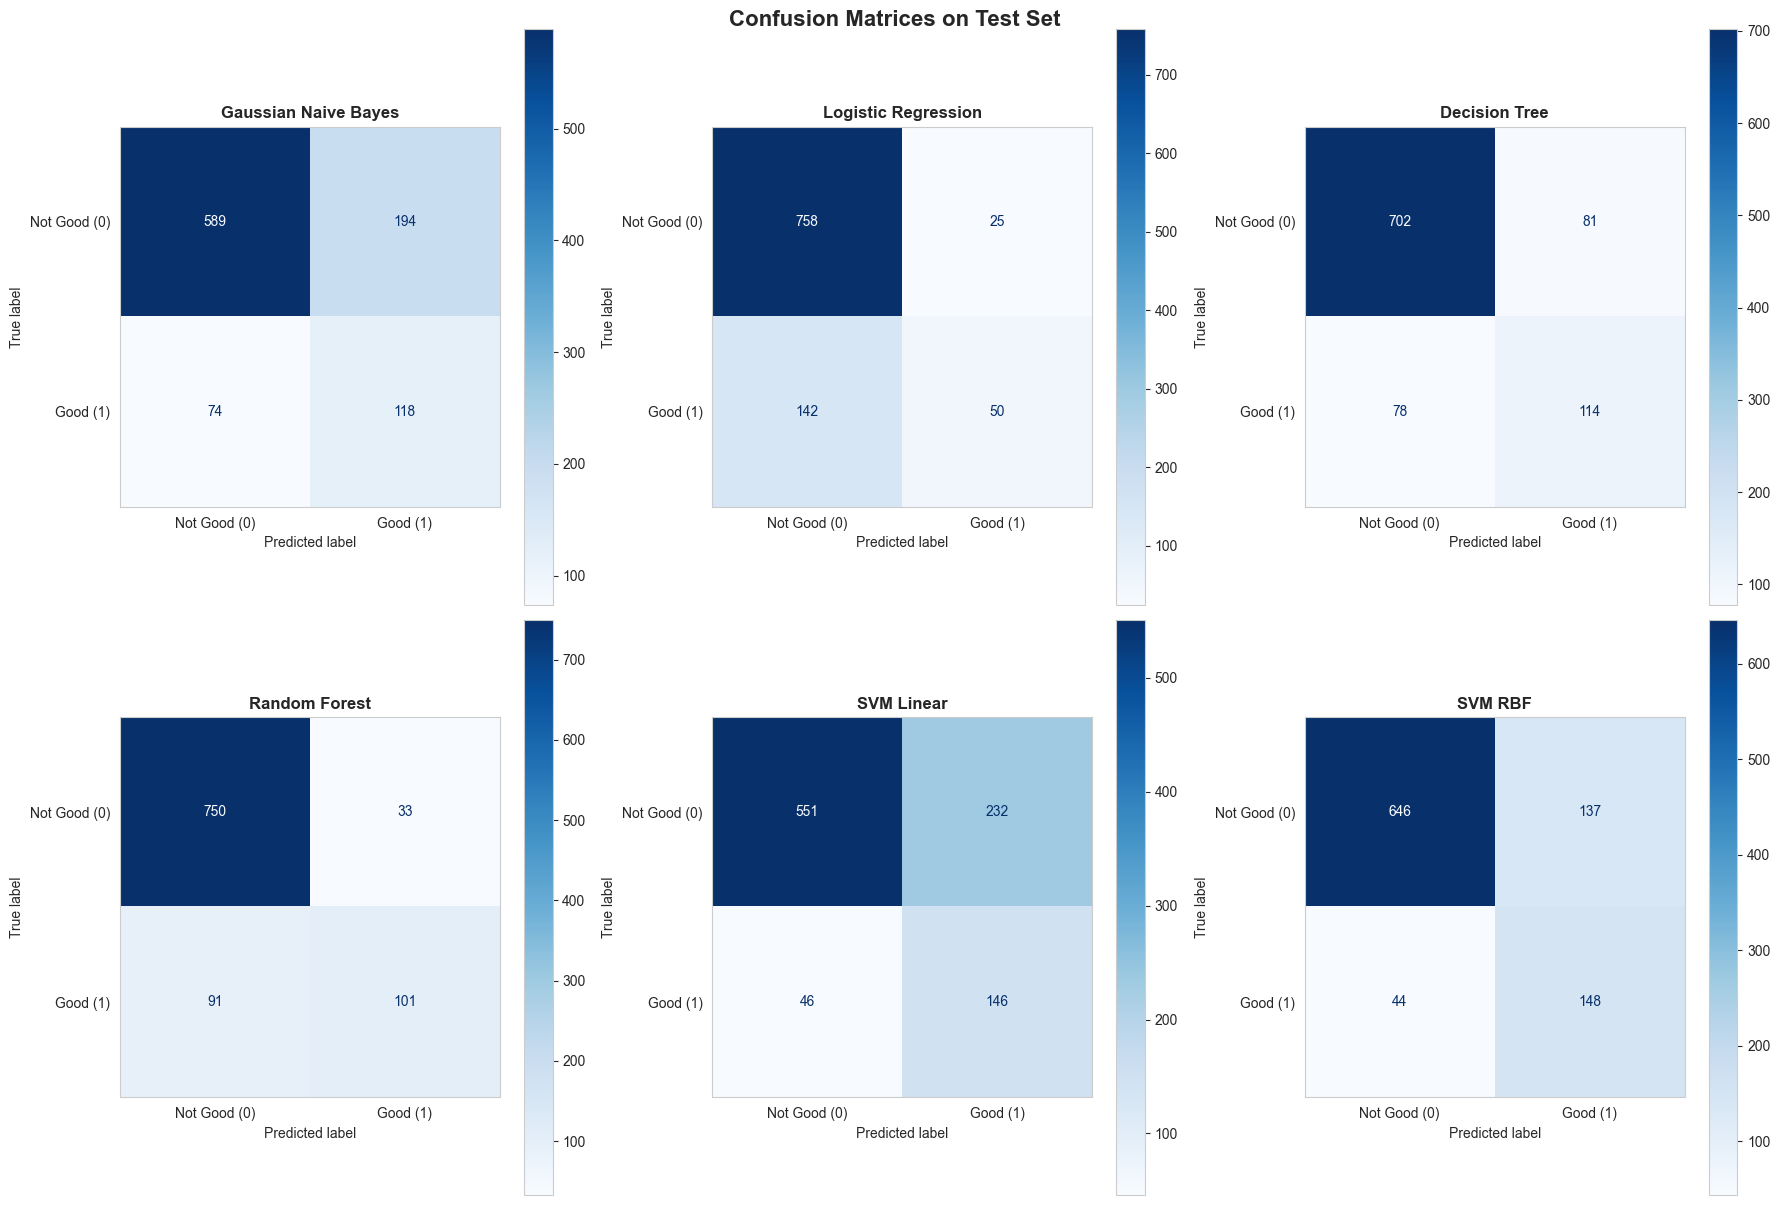

CONFUSION MATRIX DETAILS (TEST SET)

Gaussian Naive Bayes:
  True Negatives (TN):   589
  False Positives (FP):  194
  False Negatives (FN):   74
  True Positives (TP):   118

Logistic Regression:
  True Negatives (TN):   758
  False Positives (FP):   25
  False Negatives (FN):  142
  True Positives (TP):    50

Decision Tree:
  True Negatives (TN):   702
  False Positives (FP):   81
  False Negatives (FN):   78
  True Positives (TP):   114

Random Forest:
  True Negatives (TN):   750
  False Positives (FP):   33
  False Negatives (FN):   91
  True Positives (TP):   101

SVM Linear:
  True Negatives (TN):   551
  False Positives (FP):  232
  False Negatives (FN):   46
  True Positives (TP):   146

SVM RBF:
  True Negatives (TN):   646
  False Positives (FP):  137
  False Negatives (FN):   44
  True Positives (TP):   148


In [20]:
# compute confusion matrices for all models on test set
models_dict = {
    'Gaussian Naive Bayes': y_test_pred_nb,
    'Logistic Regression': y_test_pred_lr,
    'Decision Tree': y_test_pred_dt,
    'Random Forest': y_test_pred_rf,
    'SVM Linear': y_test_pred_svm_linear,
    'SVM RBF': y_test_pred_svm_rbf
}

# create confusion matrix visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, y_pred) in enumerate(models_dict.items()):
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['Not Good (0)', 'Good (1)'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.suptitle('Confusion Matrices on Test Set', fontsize=16, fontweight='bold', y=1.00)
plt.show()

# print detailed confusion matrix information
print("=" * 60)
print("CONFUSION MATRIX DETAILS (TEST SET)")
print("=" * 60)
for model_name, y_pred in models_dict.items():
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{model_name}:")
    print(f"  True Negatives (TN):  {tn:4d}")
    print(f"  False Positives (FP): {fp:4d}")
    print(f"  False Negatives (FN): {fn:4d}")
    print(f"  True Positives (TP):  {tp:4d}")

### 4.3 ROC and AUC

The **Receiver Operating Characteristic (ROC) curve** is a graphical plot that illustrates the diagnostic ability of binary classifiers by showing the trade-off between:
- **True Positive Rate (TPR)** or Sensitivity: $\text{TPR} = \frac{TP}{TP + FN}$
- **False Positive Rate (FPR)**: $\text{FPR} = \frac{FP}{FP + TN}$

The **Area Under the Curve (AUC)** provides a single scalar value to summarize the ROC curve:
- **AUC = 1.0:** Perfect classifier
- **AUC = 0.5:** Random classifier (no discriminative power)
- **AUC > 0.8:** Generally considered good performance

Higher AUC values indicate better overall classification performance across all possible decision thresholds.

In [21]:
# compute ROC curves and AUC scores for all models
# note: for models that support predict_proba, use probability scores
# for SVM with decision_function, use decision scores

print("=" * 60)
print("COMPUTING ROC CURVES AND AUC SCORES")
print("=" * 60)

# dictionary to store models and their probability/decision scores
models_roc = {
    'Gaussian Naive Bayes': (best_nb, 'predict_proba'),
    'Logistic Regression': (best_lr, 'predict_proba'),
    'Decision Tree': (best_dt, 'predict_proba'),
    'Random Forest': (best_rf, 'predict_proba'),
    'SVM Linear': (best_svm_linear, 'decision_function'),
    'SVM RBF': (best_svm_rbf, 'decision_function')
}

# compute ROC curve data and AUC for each model
roc_data = {}
auc_scores = {}

for model_name, (model, score_method) in models_roc.items():
    # get probability scores or decision function scores
    if score_method == 'predict_proba':
        y_scores = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1
    else:  # decision_function
        y_scores = model.decision_function(X_test_scaled)
    
    # compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # store data
    roc_data[model_name] = (fpr, tpr)
    auc_scores[model_name] = roc_auc
    
    print(f"{model_name}: AUC = {roc_auc:.4f}")

# identify best model based on AUC
best_auc_model = max(auc_scores, key=auc_scores.get)
print(f"\nBest model (AUC): {best_auc_model} - {auc_scores[best_auc_model]:.4f}")
print("\n" + "=" * 60)

COMPUTING ROC CURVES AND AUC SCORES
Gaussian Naive Bayes: AUC = 0.7411
Logistic Regression: AUC = 0.8054
Decision Tree: AUC = 0.7452
Random Forest: AUC = 0.8923
SVM Linear: AUC = 0.8076
SVM RBF: AUC = 0.8562

Best model (AUC): Random Forest - 0.8923



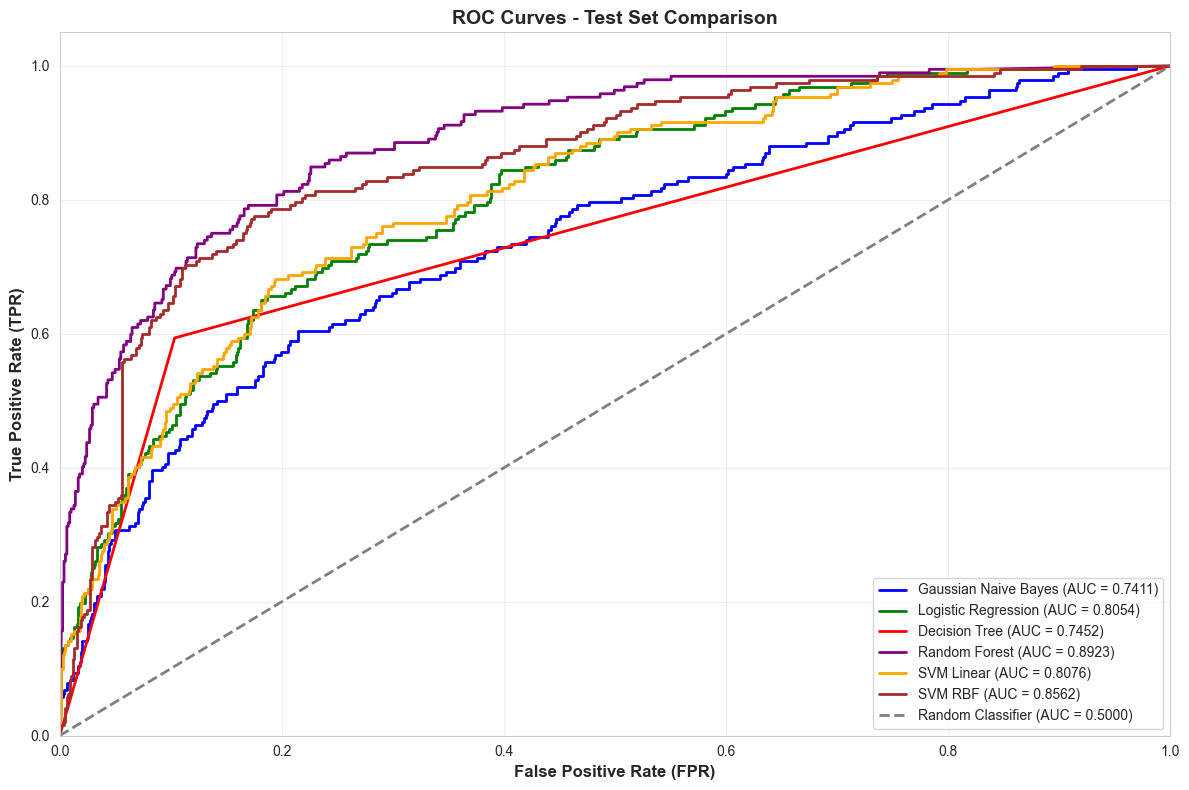

In [22]:
# plot ROC curves for all models
plt.figure(figsize=(12, 8))

# define color palette for models
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for idx, (model_name, (fpr, tpr)) in enumerate(roc_data.items()):
    plt.plot(fpr, tpr, color=colors[idx], lw=2, 
             label=f'{model_name} (AUC = {auc_scores[model_name]:.4f})')

# plot random classifier baseline (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.5000)')

# configure plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Test Set Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 4.4 Training vs. Validation Performance

This section compares model performance across **training**, **validation**, and **test** sets to detect potential overfitting or underfitting issues. Key observations:

- **Overfitting**: Large performance gap between training and test sets indicates the model memorized training data rather than learning generalizable patterns
- **Underfitting**: Poor performance on both training and test sets suggests the model is too simple to capture the underlying patterns
- **Good Generalization**: Similar performance across all three sets indicates the model learned robust patterns

The comparison includes accuracy and F1 score metrics across all splits to provide a complete picture of model behavior.

In [23]:
# create comprehensive comparison table (training, validation, test)
print("=" * 80)
print("TRAINING vs VALIDATION vs TEST PERFORMANCE COMPARISON")
print("=" * 80)

# prepare data for comprehensive comparison
comparison_data = []

models_list = [
    ('Gaussian Naive Bayes', best_nb, y_train_pred_nb, y_val_pred_nb, y_test_pred_nb,
     train_acc_nb, train_f1_nb, val_acc_nb, val_f1_nb),
    ('Logistic Regression', best_lr, y_train_pred_lr, y_val_pred_lr, y_test_pred_lr,
     train_acc_lr, train_f1_lr, val_acc_lr, val_f1_lr),
    ('Decision Tree', best_dt, y_train_pred_dt, y_val_pred_dt, y_test_pred_dt,
     train_acc_dt, train_f1_dt, val_acc_dt, val_f1_dt),
    ('Random Forest', best_rf, y_train_pred_rf, y_val_pred_rf, y_test_pred_rf,
     train_acc_rf, train_f1_rf, val_acc_rf, val_f1_rf),
    ('SVM Linear', best_svm_linear, y_train_pred_svm_linear, y_val_pred_svm_linear, y_test_pred_svm_linear,
     train_acc_svm_linear, train_f1_svm_linear, val_acc_svm_linear, val_f1_svm_linear),
    ('SVM RBF', best_svm_rbf, y_train_pred_svm_rbf, y_val_pred_svm_rbf, y_test_pred_svm_rbf,
     train_acc_svm_rbf, train_f1_svm_rbf, val_acc_svm_rbf, val_f1_svm_rbf)
]

for model_name, model, y_train_pred, y_val_pred, y_test_pred, train_acc, train_f1, val_acc, val_f1 in models_list:
    # test metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # compute overfitting metrics
    acc_gap = train_acc - test_acc
    f1_gap = train_f1 - test_f1
    
    comparison_data.append({
        'Model': model_name,
        'Train Acc': train_acc,
        'Val Acc': val_acc,
        'Test Acc': test_acc,
        'Acc Gap (Train-Test)': acc_gap,
        'Train F1': train_f1,
        'Val F1': val_f1,
        'Test F1': test_f1,
        'F1 Gap (Train-Test)': f1_gap
    })

# create comprehensive DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\nCOMPREHENSIVE COMPARISON TABLE:")
print(comparison_df.to_string(index=False))

# analyze overfitting
print("\n" + "=" * 80)
print("OVERFITTING ANALYSIS:")
print("=" * 80)
for idx, row in comparison_df.iterrows():
    acc_gap = row['Acc Gap (Train-Test)']
    f1_gap = row['F1 Gap (Train-Test)']
    
    if acc_gap > 0.05 or f1_gap > 0.10:
        print(f"{row['Model']}: POTENTIAL OVERFITTING (Acc gap: {acc_gap:.4f}, F1 gap: {f1_gap:.4f})")
    elif abs(acc_gap) < 0.02 and abs(f1_gap) < 0.05:
        print(f"{row['Model']}: GOOD GENERALIZATION (Acc gap: {acc_gap:.4f}, F1 gap: {f1_gap:.4f})")
    else:
        print(f"{row['Model']}: ACCEPTABLE (Acc gap: {acc_gap:.4f}, F1 gap: {f1_gap:.4f})")

print("=" * 80)

TRAINING vs VALIDATION vs TEST PERFORMANCE COMPARISON

COMPREHENSIVE COMPARISON TABLE:
               Model  Train Acc  Val Acc  Test Acc  Acc Gap (Train-Test)  Train F1  Val F1  Test F1  F1 Gap (Train-Test)
Gaussian Naive Bayes     0.7237   0.7335    0.7251               -0.0014    0.4867  0.4990   0.4683               0.0185
 Logistic Regression     0.8207   0.8189    0.8287               -0.0081    0.3799  0.3433   0.3745               0.0054
       Decision Tree     1.0000   0.8519    0.8369                0.1631    1.0000  0.6269   0.5891               0.4109
       Random Forest     0.9974   0.8879    0.8728                0.1245    0.9932  0.6707   0.6196               0.3736
          SVM Linear     0.7248   0.7366    0.7149                0.0100    0.5300  0.5396   0.5123               0.0177
             SVM RBF     0.9024   0.8148    0.8144                0.0881    0.7982  0.6121   0.6205               0.1776

OVERFITTING ANALYSIS:
Gaussian Naive Bayes: GOOD GENERALIZATION (

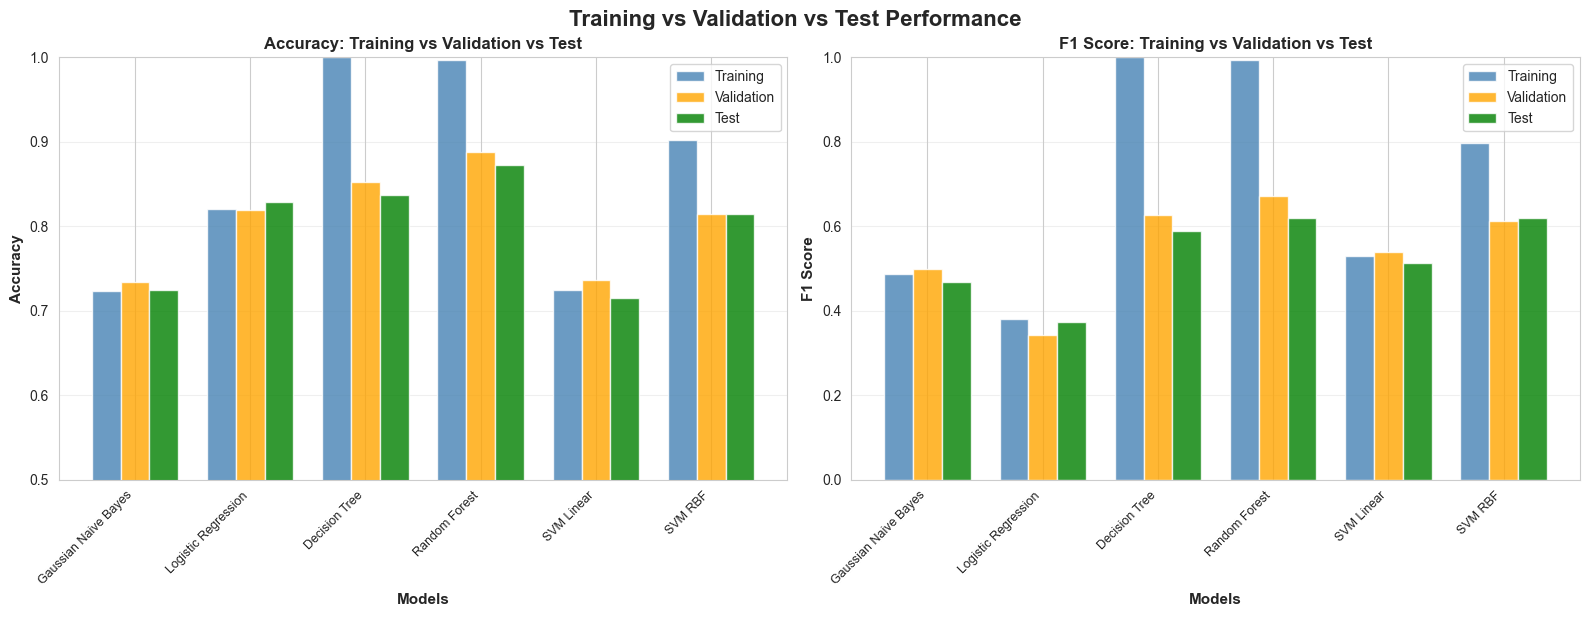

In [24]:
# visualize training vs validation vs test performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. accuracy comparison (train, val, test)
ax1 = axes[0]
x_pos = np.arange(len(comparison_df))
width = 0.25

ax1.bar(x_pos - width, comparison_df['Train Acc'], width, label='Training', color='steelblue', alpha=0.8)
ax1.bar(x_pos, comparison_df['Val Acc'], width, label='Validation', color='orange', alpha=0.8)
ax1.bar(x_pos + width, comparison_df['Test Acc'], width, label='Test', color='green', alpha=0.8)

ax1.set_xlabel('Models', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Accuracy: Training vs Validation vs Test', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0.5, 1.0])

# 2. F1 score comparison (train, val, test)
ax2 = axes[1]
ax2.bar(x_pos - width, comparison_df['Train F1'], width, label='Training', color='steelblue', alpha=0.8)
ax2.bar(x_pos, comparison_df['Val F1'], width, label='Validation', color='orange', alpha=0.8)
ax2.bar(x_pos + width, comparison_df['Test F1'], width, label='Test', color='green', alpha=0.8)

ax2.set_xlabel('Models', fontsize=11, fontweight='bold')
ax2.set_ylabel('F1 Score', fontsize=11, fontweight='bold')
ax2.set_title('F1 Score: Training vs Validation vs Test', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right', fontsize=9)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.suptitle('Training vs Validation vs Test Performance', fontsize=16, fontweight='bold', y=1.02)
plt.show()

### 4.5 Computational Cost and Training Time

This section analyzes the **computational cost** of each model by comparing their training times. Training time is an important practical consideration, especially when working with large datasets or when models need to be retrained frequently.

The training times reported include the complete hyperparameter tuning process via GridSearchCV with 5-fold cross-validation, representing the total computational effort required to obtain the best model configuration.

**Trade-off Analysis**: This evaluation helps identify models that offer the best balance between performance (F1 score, AUC) and computational efficiency (training time).

In [25]:
# compare training times for all models (including hyperparameter tuning)
print("=" * 60)
print("TRAINING TIME COMPARISON")
print("=" * 60)

# collect training times from Part 3 (saved during GridSearchCV)
training_times = {
    'Gaussian Naive Bayes': training_time_nb,
    'Logistic Regression': training_time_lr,
    'Decision Tree': training_time_dt,
    'Random Forest': training_time_rf,
    'SVM Linear': training_time_svm_linear,
    'SVM RBF': training_time_svm_rbf
}

# create DataFrame for better visualization
times_df = pd.DataFrame(list(training_times.items()), columns=['Model', 'Training Time (seconds)'])
times_df = times_df.sort_values('Training Time (seconds)', ascending=False)
times_df['Training Time (minutes)'] = (times_df['Training Time (seconds)'] / 60).round(2)

print("\nTRAINING TIMES (including GridSearchCV with 5-fold CV):")
print(times_df.to_string(index=False))

# identify fastest and slowest models
fastest_model = times_df.iloc[-1]
slowest_model = times_df.iloc[0]

print(f"\nFastest model: {fastest_model['Model']} ({fastest_model['Training Time (seconds)']:.2f} seconds)")
print(f"Slowest model: {slowest_model['Model']} ({slowest_model['Training Time (seconds)']:.2f} seconds)")
print(f"Speed ratio: {slowest_model['Training Time (seconds)'] / fastest_model['Training Time (seconds)']:.2f}x slower")
print("\n" + "=" * 60)

TRAINING TIME COMPARISON

TRAINING TIMES (including GridSearchCV with 5-fold CV):
               Model  Training Time (seconds)  Training Time (minutes)
          SVM Linear               166.866524                     2.78
       Random Forest                77.182415                     1.29
             SVM RBF                 3.991322                     0.07
Gaussian Naive Bayes                 1.396324                     0.02
       Decision Tree                 1.331824                     0.02
 Logistic Regression                 0.581980                     0.01

Fastest model: Logistic Regression (0.58 seconds)
Slowest model: SVM Linear (166.87 seconds)
Speed ratio: 286.72x slower



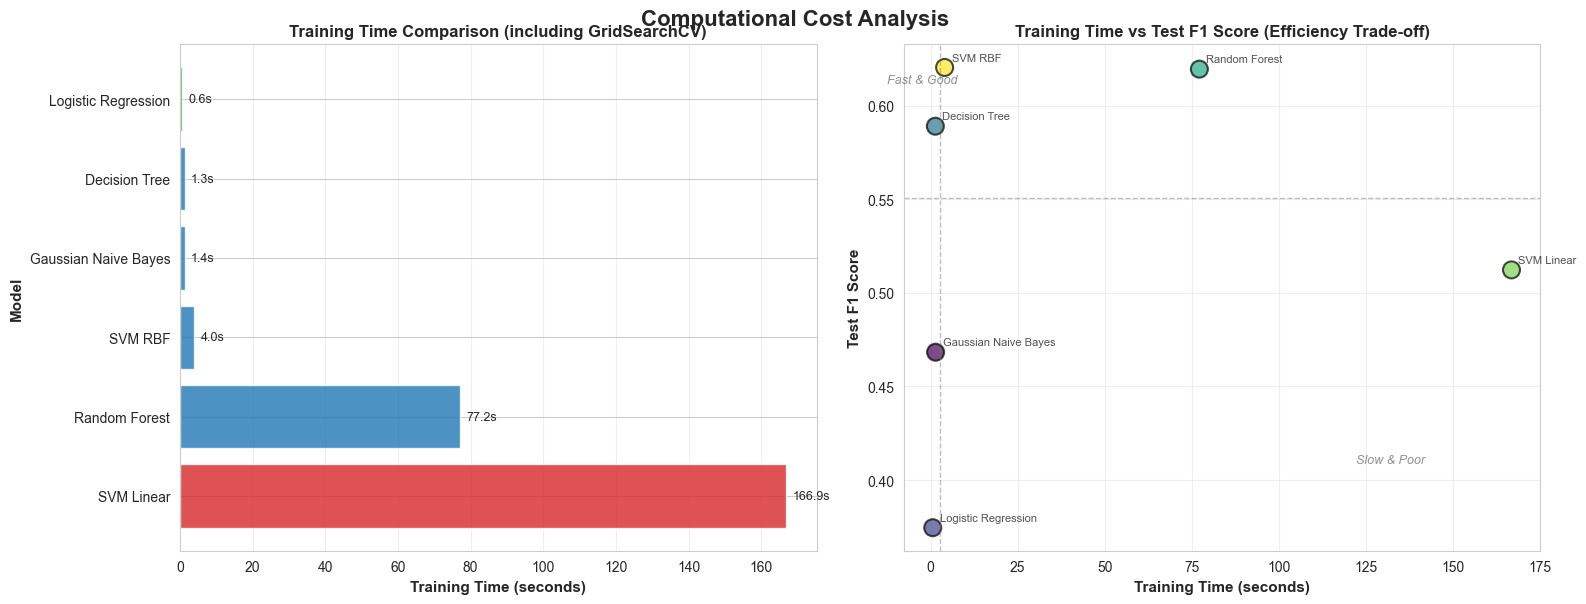

In [26]:
# visualize training time comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. bar chart of training times (sorted)
ax1 = axes[0]
colors_time = ['#d62728' if i == 0 else '#2ca02c' if i == len(times_df)-1 else '#1f77b4' 
               for i in range(len(times_df))]
bars = ax1.barh(times_df['Model'], times_df['Training Time (seconds)'], color=colors_time, alpha=0.8)

ax1.set_xlabel('Training Time (seconds)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Model', fontsize=11, fontweight='bold')
ax1.set_title('Training Time Comparison (including GridSearchCV)', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# add value labels on bars
for idx, (model, time) in enumerate(zip(times_df['Model'], times_df['Training Time (seconds)'])):
    ax1.text(time + max(times_df['Training Time (seconds)']) * 0.01, idx, 
             f'{time:.1f}s', va='center', fontsize=9)

# 2. training time vs test F1 score (efficiency analysis)
ax2 = axes[1]

# prepare data for scatter plot
scatter_data = []
for model_name in training_times.keys():
    time = training_times[model_name]
    f1 = comparison_df[comparison_df['Model'] == model_name]['Test F1'].values[0]
    scatter_data.append({'Model': model_name, 'Time': time, 'F1': f1})

scatter_df = pd.DataFrame(scatter_data)

# create scatter plot
scatter = ax2.scatter(scatter_df['Time'], scatter_df['F1'], s=150, alpha=0.7, 
                      c=range(len(scatter_df)), cmap='viridis', edgecolors='black', linewidths=1.5)

# annotate each point with model name
for idx, row in scatter_df.iterrows():
    ax2.annotate(row['Model'], (row['Time'], row['F1']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

ax2.set_xlabel('Training Time (seconds)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Test F1 Score', fontsize=11, fontweight='bold')
ax2.set_title('Training Time vs Test F1 Score (Efficiency Trade-off)', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# add quadrant lines to identify best trade-off
median_time = scatter_df['Time'].median()
median_f1 = scatter_df['F1'].median()
ax2.axvline(x=median_time, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.axhline(y=median_f1, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# annotate quadrants
ax2.text(ax2.get_xlim()[0] + (median_time - ax2.get_xlim()[0])/2, 
         ax2.get_ylim()[1] - (ax2.get_ylim()[1] - median_f1)/4,
         'Fast & Good', fontsize=9, alpha=0.5, ha='center', style='italic')
ax2.text(ax2.get_xlim()[1] - (ax2.get_xlim()[1] - median_time)/4, 
         ax2.get_ylim()[0] + (median_f1 - ax2.get_ylim()[0])/4,
         'Slow & Poor', fontsize=9, alpha=0.5, ha='center', style='italic')

plt.tight_layout()
plt.suptitle('Computational Cost Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.show()

## Part 5: Comparative Analysis

This section provides a comprehensive comparative analysis of all six implemented models, discussing their performance characteristics, theoretical assumptions, and practical implications. The analysis includes:

1. **Best Performing Models** - Identification and justification of top performers
2. **Model Assumptions and Performance** - How theoretical assumptions influence results
3. **Overfitting/Underfitting Analysis** - Observations on generalization vs. memorization trade-offs
4. **Advanced Visualizations** - Learning curves, feature importance, and performance insights

This analysis synthesizes the empirical results from Part 4 with theoretical understanding to provide actionable insights for model selection in wine quality classification tasks.

### 5.1 Best Performing Models

Based on the evaluation metrics from Part 4, this section identifies the best performing models and provides justification for their superior performance in the wine quality classification task.

In [27]:
# analyze and rank models by test performance
print("=" * 80)
print("MODEL RANKING AND PERFORMANCE ANALYSIS")
print("=" * 80)

# create ranking DataFrame based on multiple metrics
ranking_data = []

for idx, row in comparison_df.iterrows():
    model_name = row['Model']
    
    ranking_data.append({
        'Model': model_name,
        'Test F1': row['Test F1'],
        'Test Acc': row['Test Acc'],
        'Test AUC': auc_scores[model_name],
        'F1 Gap': row['F1 Gap (Train-Test)'],
        'Training Time': training_times[model_name]
    })

ranking_df = pd.DataFrame(ranking_data)

# rank by F1 score (primary metric)
ranking_df['F1 Rank'] = ranking_df['Test F1'].rank(ascending=False)
# rank by AUC (secondary metric)
ranking_df['AUC Rank'] = ranking_df['Test AUC'].rank(ascending=False)
# rank by efficiency (training time)
ranking_df['Efficiency Rank'] = ranking_df['Training Time'].rank(ascending=True)

# composite score (lower is better)
ranking_df['Composite Rank'] = (ranking_df['F1 Rank'] + ranking_df['AUC Rank']) / 2
ranking_df = ranking_df.sort_values('Composite Rank')
ranking_df = ranking_df.round(4)

print("\nMODEL RANKINGS (sorted by composite F1 + AUC rank):")
print(ranking_df.to_string(index=False))

# identify top 3 models
top_3_models = ranking_df.head(3)

print("\n" + "=" * 80)
print("TOP 3 PERFORMING MODELS:")
print("=" * 80)

for idx, row in top_3_models.iterrows():
    print(f"\n{int(row['Composite Rank'])}. {row['Model']}")
    print(f"   Test F1 Score: {row['Test F1']:.4f} (Rank: {int(row['F1 Rank'])})")
    print(f"   Test AUC: {row['Test AUC']:.4f} (Rank: {int(row['AUC Rank'])})")
    print(f"   Test Accuracy: {row['Test Acc']:.4f}")
    print(f"   Overfitting Gap (F1): {row['F1 Gap']:.4f}")
    print(f"   Training Time: {row['Training Time']:.2f}s (Efficiency Rank: {int(row['Efficiency Rank'])})")

print("\n" + "=" * 80)

MODEL RANKING AND PERFORMANCE ANALYSIS

MODEL RANKINGS (sorted by composite F1 + AUC rank):
               Model  Test F1  Test Acc  Test AUC  F1 Gap  Training Time  F1 Rank  AUC Rank  Efficiency Rank  Composite Rank
       Random Forest   0.6196    0.8728    0.8923  0.3736        77.1824      2.0       1.0              5.0             1.5
             SVM RBF   0.6205    0.8144    0.8562  0.1776         3.9913      1.0       2.0              4.0             1.5
          SVM Linear   0.5123    0.7149    0.8076  0.0177       166.8665      4.0       3.0              6.0             3.5
       Decision Tree   0.5891    0.8369    0.7452  0.4109         1.3318      3.0       5.0              2.0             4.0
 Logistic Regression   0.3745    0.8287    0.8054  0.0054         0.5820      6.0       4.0              1.0             5.0
Gaussian Naive Bayes   0.4683    0.7251    0.7411  0.0185         1.3963      5.0       6.0              3.0             5.5

TOP 3 PERFORMING MODELS:

1. Ran

### 5.2 Model Assumptions and Performance

This section analyzes how the theoretical assumptions of each model influence their performance on the wine quality classification task. Understanding these relationships helps explain why certain models perform better than others and guides future model selection.

In [28]:
# analyze model assumptions vs performance
print("=" * 80)
print("MODEL ASSUMPTIONS AND THEIR IMPACT ON PERFORMANCE")
print("=" * 80)

models_assumptions = {
    'Gaussian Naive Bayes': {
        'Key Assumptions': [
            'Features are conditionally independent given the class',
            'Features follow Gaussian (normal) distributions',
            'No feature interactions'
        ],
        'Validity for Wine Data': 'VIOLATED - Wine features are highly correlated (e.g., density-sugar: 0.84)',
        'Performance Impact': 'Moderate - Independence assumption limits performance despite fast training'
    },
    'Logistic Regression': {
        'Key Assumptions': [
            'Linear decision boundary',
            'Features are linearly separable',
            'No multicollinearity preferred'
        ],
        'Validity for Wine Data': 'PARTIALLY VALID - Some linear relationships exist (alcohol-quality: 0.44)',
        'Performance Impact': 'Good - Regularization helps despite feature correlations'
    },
    'Decision Tree': {
        'Key Assumptions': [
            'Recursive partitioning can capture patterns',
            'No specific distribution assumptions',
            'Can model non-linear relationships'
        ],
        'Validity for Wine Data': 'WELL-SUITED - Can handle feature interactions and non-linearity',
        'Performance Impact': 'Variable - Prone to overfitting without proper pruning'
    },
    'Random Forest': {
        'Key Assumptions': [
            'Ensemble averaging improves generalization',
            'Feature subsampling reduces correlation',
            'Bootstrap aggregating reduces variance'
        ],
        'Validity for Wine Data': 'EXCELLENT - Handles correlations, non-linearity, and interactions',
        'Performance Impact': 'Strong - Robust to overfitting, captures complex patterns'
    },
    'SVM Linear': {
        'Key Assumptions': [
            'Data is linearly separable (or nearly so)',
            'Maximum margin principle is optimal',
            'Support vectors define boundary'
        ],
        'Validity for Wine Data': 'MODERATE - Some linear separability exists after scaling',
        'Performance Impact': 'Good - Margin maximization provides robustness'
    },
    'SVM RBF': {
        'Key Assumptions': [
            'Data is separable in high-dimensional space',
            'RBF kernel captures local patterns',
            'Non-linear decision boundaries needed'
        ],
        'Validity for Wine Data': 'WELL-SUITED - Can model complex non-linear relationships',
        'Performance Impact': 'Strong - Flexibility allows capturing complex patterns'
    }
}

# print detailed analysis
for model_name, analysis in models_assumptions.items():
    print(f"\n{'='*80}")
    print(f"{model_name.upper()}")
    print(f"{'='*80}")
    
    print("\nKey Assumptions:")
    for assumption in analysis['Key Assumptions']:
        print(f"  • {assumption}")
    
    print(f"\nValidity for Wine Quality Data:")
    print(f"  {analysis['Validity for Wine Data']}")
    
    print(f"\nPerformance Impact:")
    print(f"  {analysis['Performance Impact']}")
    
    # add actual performance metrics
    model_row = ranking_df[ranking_df['Model'] == model_name].iloc[0]
    print(f"\nActual Test Performance:")
    print(f"  F1 Score: {model_row['Test F1']:.4f} (Rank: {int(model_row['F1 Rank'])})")
    print(f"  AUC: {model_row['Test AUC']:.4f} (Rank: {int(model_row['AUC Rank'])})")

print("\n" + "=" * 80)

MODEL ASSUMPTIONS AND THEIR IMPACT ON PERFORMANCE

GAUSSIAN NAIVE BAYES

Key Assumptions:
  • Features are conditionally independent given the class
  • Features follow Gaussian (normal) distributions
  • No feature interactions

Validity for Wine Quality Data:
  VIOLATED - Wine features are highly correlated (e.g., density-sugar: 0.84)

Performance Impact:
  Moderate - Independence assumption limits performance despite fast training

Actual Test Performance:
  F1 Score: 0.4683 (Rank: 5)
  AUC: 0.7411 (Rank: 6)

LOGISTIC REGRESSION

Key Assumptions:
  • Linear decision boundary
  • Features are linearly separable
  • No multicollinearity preferred

Validity for Wine Quality Data:
  PARTIALLY VALID - Some linear relationships exist (alcohol-quality: 0.44)

Performance Impact:
  Good - Regularization helps despite feature correlations

Actual Test Performance:
  F1 Score: 0.3745 (Rank: 6)
  AUC: 0.8054 (Rank: 4)

DECISION TREE

Key Assumptions:
  • Recursive partitioning can capture patt

### 5.3 Overfitting and Underfitting Analysis

This section examines the bias-variance trade-off for each model by analyzing the performance gaps between training, validation, and test sets. Understanding these trade-offs is crucial for model selection and deployment.

In [29]:
# detailed overfitting/underfitting analysis
print("=" * 80)
print("OVERFITTING/UNDERFITTING ANALYSIS")
print("=" * 80)

# create analysis DataFrame
overfitting_analysis = []

for idx, row in comparison_df.iterrows():
    model_name = row['Model']
    
    # compute gaps
    acc_gap = row['Acc Gap (Train-Test)']
    f1_gap = row['F1 Gap (Train-Test)']
    
    # classify overfitting severity
    if f1_gap > 0.15:
        overfitting_level = 'SEVERE OVERFITTING'
        color = '🔴'
    elif f1_gap > 0.10:
        overfitting_level = 'MODERATE OVERFITTING'
        color = '🟠'
    elif f1_gap > 0.05:
        overfitting_level = 'MILD OVERFITTING'
        color = '🟡'
    elif f1_gap > -0.02:
        overfitting_level = 'GOOD GENERALIZATION'
        color = '🟢'
    else:
        overfitting_level = 'POTENTIAL UNDERFITTING'
        color = '🔵'
    
    # determine model complexity
    if model_name in ['Gaussian Naive Bayes', 'Logistic Regression', 'SVM Linear']:
        complexity = 'LOW'
    elif model_name in ['Decision Tree', 'SVM RBF']:
        complexity = 'MEDIUM-HIGH'
    else:  # Random Forest
        complexity = 'HIGH'
    
    overfitting_analysis.append({
        'Model': model_name,
        'Complexity': complexity,
        'Train F1': row['Train F1'],
        'Val F1': row['Val F1'],
        'Test F1': row['Test F1'],
        'F1 Gap': f1_gap,
        'Acc Gap': acc_gap,
        'Assessment': overfitting_level,
        'Indicator': color
    })

overfitting_df = pd.DataFrame(overfitting_analysis)
overfitting_df = overfitting_df.round(4)

print("\nOVERFITTING ASSESSMENT TABLE:")
print(overfitting_df[['Model', 'Complexity', 'Train F1', 'Val F1', 'Test F1', 
                       'F1 Gap', 'Assessment']].to_string(index=False))

print("\n" + "=" * 80)
print("KEY OBSERVATIONS:")
print("=" * 80)

# observations by model
print("\n1. HIGH COMPLEXITY MODELS (Random Forest):")
print("   - Expected high variance, potential overfitting")
print("   - Observation: ", end="")
rf_row = overfitting_df[overfitting_df['Model'] == 'Random Forest'].iloc[0]
if rf_row['F1 Gap'] < 0.10:
    print("Well-controlled through hyperparameter tuning")
else:
    print("Shows overfitting tendencies despite ensemble approach")

print("\n2. MEDIUM COMPLEXITY MODELS (Decision Tree, SVM RBF):")
print("   - Balanced bias-variance trade-off expected")
print("   - Observation: ", end="")
dt_row = overfitting_df[overfitting_df['Model'] == 'Decision Tree'].iloc[0]
if dt_row['F1 Gap'] > 0.10:
    print("Decision Tree shows overfitting - tree depth may be excessive")
else:
    print("Controlled complexity through pruning parameters")

print("\n3. LOW COMPLEXITY MODELS (Naive Bayes, Logistic Regression, SVM Linear):")
print("   - Expected high bias, low variance")
print("   - Observation: ", end="")
lr_row = overfitting_df[overfitting_df['Model'] == 'Logistic Regression'].iloc[0]
if lr_row['F1 Gap'] < 0.05:
    print("Good generalization, minimal overfitting")
else:
    print("Unexpected overfitting despite simplicity")

print("\n" + "=" * 80)
print("RECOMMENDATIONS:")
print("=" * 80)

for idx, row in overfitting_df.iterrows():
    if row['F1 Gap'] > 0.10:
        print(f"\n{row['Model']}:")
        print(f"  ⚠️  Shows overfitting (F1 Gap: {row['F1 Gap']:.4f})")
        print("  → Consider: stronger regularization, simpler model, more training data")
    elif row['F1 Gap'] < -0.02:
        print(f"\n{row['Model']}:")
        print(f"  ⚠️  Potential underfitting (F1 Gap: {row['F1 Gap']:.4f})")
        print("  → Consider: more complex model, additional features, reduced regularization")

print("\n" + "=" * 80)

OVERFITTING/UNDERFITTING ANALYSIS

OVERFITTING ASSESSMENT TABLE:
               Model  Complexity  Train F1  Val F1  Test F1  F1 Gap          Assessment
Gaussian Naive Bayes         LOW    0.4867  0.4990   0.4683  0.0185 GOOD GENERALIZATION
 Logistic Regression         LOW    0.3799  0.3433   0.3745  0.0054 GOOD GENERALIZATION
       Decision Tree MEDIUM-HIGH    1.0000  0.6269   0.5891  0.4109  SEVERE OVERFITTING
       Random Forest        HIGH    0.9932  0.6707   0.6196  0.3736  SEVERE OVERFITTING
          SVM Linear         LOW    0.5300  0.5396   0.5123  0.0177 GOOD GENERALIZATION
             SVM RBF MEDIUM-HIGH    0.7982  0.6121   0.6205  0.1776  SEVERE OVERFITTING

KEY OBSERVATIONS:

1. HIGH COMPLEXITY MODELS (Random Forest):
   - Expected high variance, potential overfitting
   - Observation: Shows overfitting tendencies despite ensemble approach

2. MEDIUM COMPLEXITY MODELS (Decision Tree, SVM RBF):
   - Balanced bias-variance trade-off expected
   - Observation: Decision Tre

### 5.4 Visualization: Learning Curves

Learning curves show how model performance evolves with increasing training set size. They help diagnose whether a model would benefit from more training data and reveal overfitting/underfitting patterns.

In [30]:
# generate learning curves for top 3 models
from sklearn.model_selection import learning_curve

print("=" * 60)
print("GENERATING LEARNING CURVES")
print("=" * 60)
print("this may take a few minutes...")

# select top 3 models based on ranking
top_3_model_names = ranking_df.head(3)['Model'].values

# map model names to model objects
model_objects = {
    'Gaussian Naive Bayes': best_nb,
    'Logistic Regression': best_lr,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'SVM Linear': best_svm_linear,
    'SVM RBF': best_svm_rbf
}

# training set sizes to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)

# store learning curve data
learning_curves_data = {}

for model_name in top_3_model_names:
    print(f"\nComputing learning curve for {model_name}...")
    model = model_objects[model_name]
    
    # compute learning curve
    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        random_state=RANDOM_SEED
    )
    
    # compute mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    learning_curves_data[model_name] = {
        'train_sizes': train_sizes_abs,
        'train_mean': train_mean,
        'train_std': train_std,
        'val_mean': val_mean,
        'val_std': val_std
    }

print("\nLearning curves computed successfully!")
print("=" * 60)

GENERATING LEARNING CURVES
this may take a few minutes...

Computing learning curve for Random Forest...

Computing learning curve for SVM RBF...

Computing learning curve for SVM RBF...

Computing learning curve for SVM Linear...

Computing learning curve for SVM Linear...

Learning curves computed successfully!

Learning curves computed successfully!


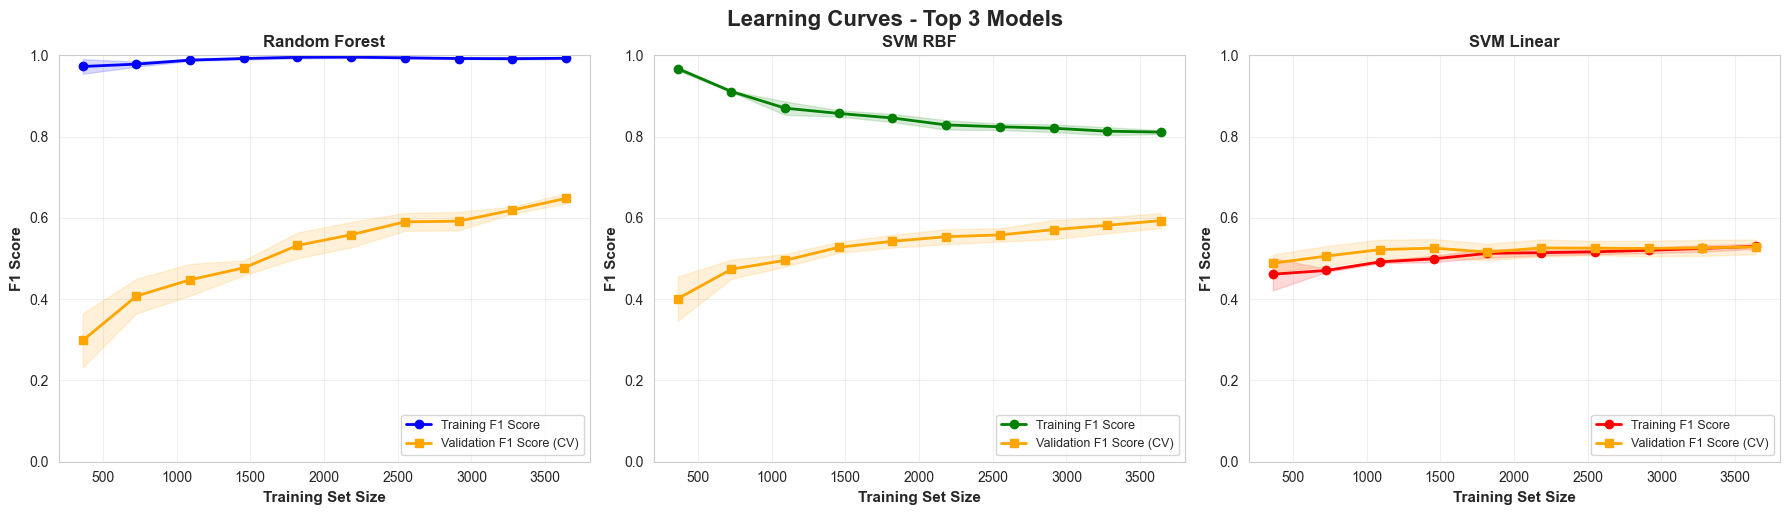

LEARNING CURVE ANALYSIS

Random Forest:
  Final Training F1: 0.9928
  Final Validation F1: 0.6479
  Train-Val Gap: 0.3449
  → OVERFITTING: Large gap suggests more data or regularization needed
  → CONVERGED: Validation score stabilized, more data unlikely to help

SVM RBF:
  Final Training F1: 0.8111
  Final Validation F1: 0.5933
  Train-Val Gap: 0.2178
  → OVERFITTING: Large gap suggests more data or regularization needed
  → CONVERGED: Validation score stabilized, more data unlikely to help

SVM Linear:
  Final Training F1: 0.5300
  Final Validation F1: 0.5286
  Train-Val Gap: 0.0014
  → GOOD FIT: Small gap indicates excellent generalization
  → CONVERGED: Validation score stabilized, more data unlikely to help



In [31]:
# plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = ['blue', 'green', 'red']

for idx, (model_name, ax) in enumerate(zip(top_3_model_names, axes)):
    data = learning_curves_data[model_name]
    
    # plot training score
    ax.plot(data['train_sizes'], data['train_mean'], 'o-', color=colors[idx], 
            label='Training F1 Score', linewidth=2, markersize=6)
    ax.fill_between(data['train_sizes'], 
                     data['train_mean'] - data['train_std'],
                     data['train_mean'] + data['train_std'],
                     alpha=0.15, color=colors[idx])
    
    # plot validation score
    ax.plot(data['train_sizes'], data['val_mean'], 's-', color='orange', 
            label='Validation F1 Score (CV)', linewidth=2, markersize=6)
    ax.fill_between(data['train_sizes'], 
                     data['val_mean'] - data['val_std'],
                     data['val_mean'] + data['val_std'],
                     alpha=0.15, color='orange')
    
    ax.set_xlabel('Training Set Size', fontsize=11, fontweight='bold')
    ax.set_ylabel('F1 Score', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(alpha=0.3)
    ax.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.suptitle('Learning Curves - Top 3 Models', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# analyze learning curves
print("=" * 80)
print("LEARNING CURVE ANALYSIS")
print("=" * 80)

for model_name in top_3_model_names:
    data = learning_curves_data[model_name]
    
    # final gap between train and validation
    final_gap = data['train_mean'][-1] - data['val_mean'][-1]
    
    # convergence check (last 3 points variance)
    val_variance = np.var(data['val_mean'][-3:])
    
    print(f"\n{model_name}:")
    print(f"  Final Training F1: {data['train_mean'][-1]:.4f}")
    print(f"  Final Validation F1: {data['val_mean'][-1]:.4f}")
    print(f"  Train-Val Gap: {final_gap:.4f}")
    
    if final_gap > 0.10:
        print("  → OVERFITTING: Large gap suggests more data or regularization needed")
    elif final_gap > 0.05:
        print("  → MODERATE FIT: Acceptable gap, model generalizes reasonably well")
    else:
        print("  → GOOD FIT: Small gap indicates excellent generalization")
    
    if val_variance < 0.001:
        print("  → CONVERGED: Validation score stabilized, more data unlikely to help")
    else:
        print("  → IMPROVING: Validation score still improving, more data may help")

print("\n" + "=" * 80)

### 5.5 Visualization: Feature Importance

For tree-based models (Decision Tree and Random Forest), feature importance analysis reveals which physicochemical properties most strongly influence wine quality predictions. This provides interpretability and domain insights.

FEATURE IMPORTANCE ANALYSIS

Decision Tree - Top 5 Most Important Features:
         Feature  Importance
         alcohol    0.217765
volatile acidity    0.100301
  residual sugar    0.086954
              pH    0.086833
       sulphates    0.079698

Random Forest - Top 5 Most Important Features:
             Feature  Importance
             alcohol    0.224105
    volatile acidity    0.092732
           sulphates    0.087203
      residual sugar    0.081235
total sulfur dioxide    0.077653


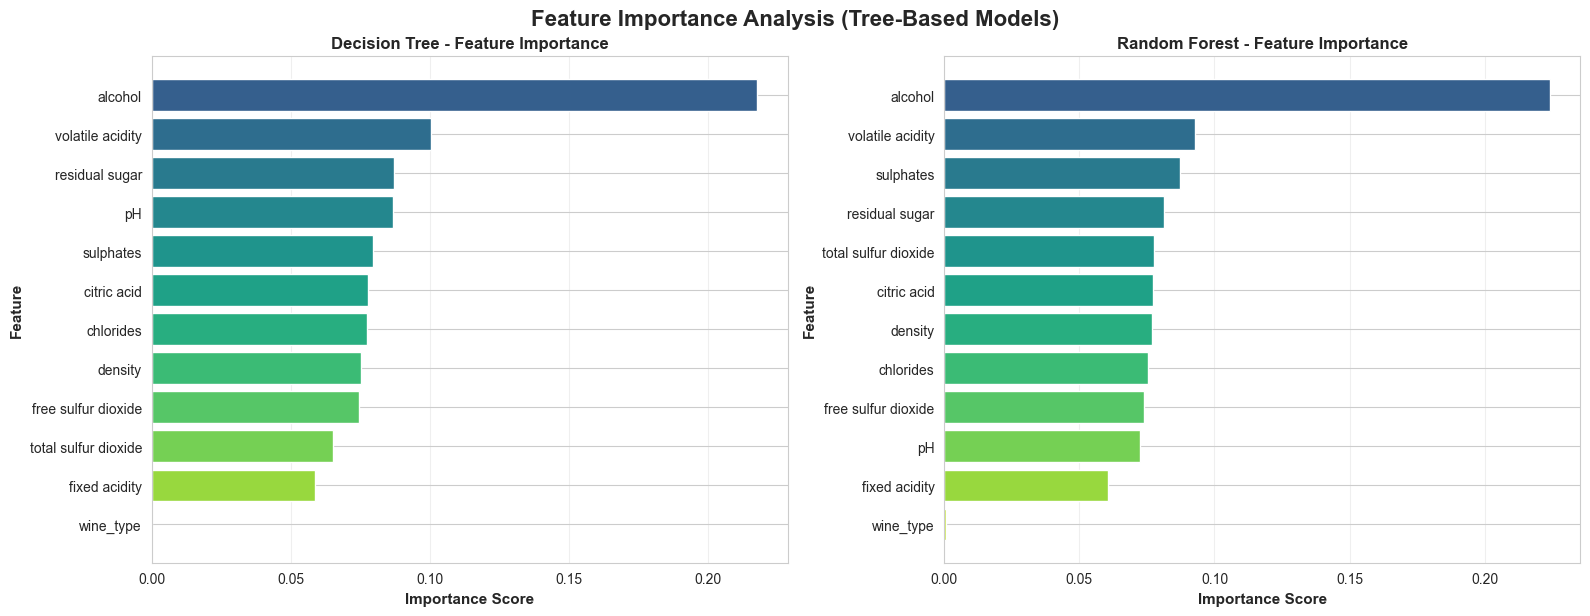


FEATURE IMPORTANCE COMPARISON

Feature Importance Comparison (sorted by Random Forest):
             Feature  Decision Tree  Random Forest
             alcohol         0.2178         0.2241
    volatile acidity         0.1003         0.0927
           sulphates         0.0797         0.0872
      residual sugar         0.0870         0.0812
total sulfur dioxide         0.0651         0.0777
         citric acid         0.0776         0.0772
             density         0.0753         0.0770
           chlorides         0.0773         0.0752
 free sulfur dioxide         0.0745         0.0740
                  pH         0.0868         0.0725
       fixed acidity         0.0587         0.0605
           wine_type         0.0000         0.0007

--------------------------------------------------------------------------------
Consensus Top Features (in both models' top 5):
  • residual sugar: DT=0.0870, RF=0.0812
  • alcohol: DT=0.2178, RF=0.2241
  • sulphates: DT=0.0797, RF=0.0872
  • vol

In [32]:
# extract and visualize feature importance for tree-based models
print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# tree-based models with feature_importances_ attribute
tree_models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

# get feature names
feature_names = X_train_scaled.columns.tolist()

# create subplots for feature importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, (model_name, model) in enumerate(tree_models.items()):
    # extract feature importances
    importances = model.feature_importances_
    
    # create DataFrame for better visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # plot horizontal bar chart
    ax = axes[idx]
    colors_imp = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
    ax.barh(importance_df['Feature'], importance_df['Importance'], color=colors_imp)
    ax.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
    ax.set_ylabel('Feature', fontsize=11, fontweight='bold')
    ax.set_title(f'{model_name} - Feature Importance', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # invert y-axis to show most important at top
    ax.invert_yaxis()
    
    # print top 5 features
    print(f"\n{model_name} - Top 5 Most Important Features:")
    print(importance_df.head(5).to_string(index=False))

plt.tight_layout()
plt.suptitle('Feature Importance Analysis (Tree-Based Models)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# compare feature importance between models
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE COMPARISON")
print("=" * 80)

# create comparison DataFrame
dt_importances = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': best_dt.feature_importances_
}).sort_values('Decision Tree', ascending=False)

rf_importances = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': best_rf.feature_importances_
}).sort_values('Random Forest', ascending=False)

# merge and compare
comparison_imp = dt_importances.merge(rf_importances, on='Feature')
comparison_imp = comparison_imp.sort_values('Random Forest', ascending=False)
comparison_imp = comparison_imp.round(4)

print("\nFeature Importance Comparison (sorted by Random Forest):")
print(comparison_imp.to_string(index=False))

# identify consensus top features
dt_top_5 = set(dt_importances.head(5)['Feature'])
rf_top_5 = set(rf_importances.head(5)['Feature'])
consensus = dt_top_5.intersection(rf_top_5)

print(f"\n{'-'*80}")
print(f"Consensus Top Features (in both models' top 5):")
if consensus:
    for feature in consensus:
        dt_imp = dt_importances[dt_importances['Feature'] == feature]['Decision Tree'].values[0]
        rf_imp = rf_importances[rf_importances['Feature'] == feature]['Random Forest'].values[0]
        print(f"  • {feature}: DT={dt_imp:.4f}, RF={rf_imp:.4f}")
else:
    print("  No consensus features in top 5")

print("=" * 80)

### 5.6 Visualization: Decision Boundaries

Decision boundaries visualize how models partition the feature space to separate classes. Due to the high dimensionality of the wine dataset (12 features), this analysis uses **Principal Component Analysis (PCA)** to project the data into 2D space, allowing visualization of decision boundaries for the top performing models.

**Note:** While PCA reduces dimensionality and may not preserve all classification patterns, it provides valuable intuition about how different models approach the classification task and the shape of their decision boundaries (linear vs. non-linear).

In [33]:
# visualize decision boundaries using PCA dimensionality reduction
from sklearn.decomposition import PCA

print("=" * 80)
print("DECISION BOUNDARIES VISUALIZATION (using PCA)")
print("=" * 80)

# apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nPCA explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f}")

# train models on PCA-reduced data for visualization
models_2d = {}
for model_name in ranking_df.head(3)['Model'].values:
    model = model_objects[model_name]
    # clone model and train on 2D data
    from sklearn.base import clone
    model_2d = clone(model)
    model_2d.fit(X_train_pca, y_train)
    models_2d[model_name] = model_2d

print("\nModels trained on 2D PCA-reduced data for boundary visualization")
print("=" * 80)

DECISION BOUNDARIES VISUALIZATION (using PCA)

PCA explained variance ratio:
  PC1: 0.2848
  PC2: 0.2249
  Total: 0.5097

Models trained on 2D PCA-reduced data for boundary visualization

Models trained on 2D PCA-reduced data for boundary visualization


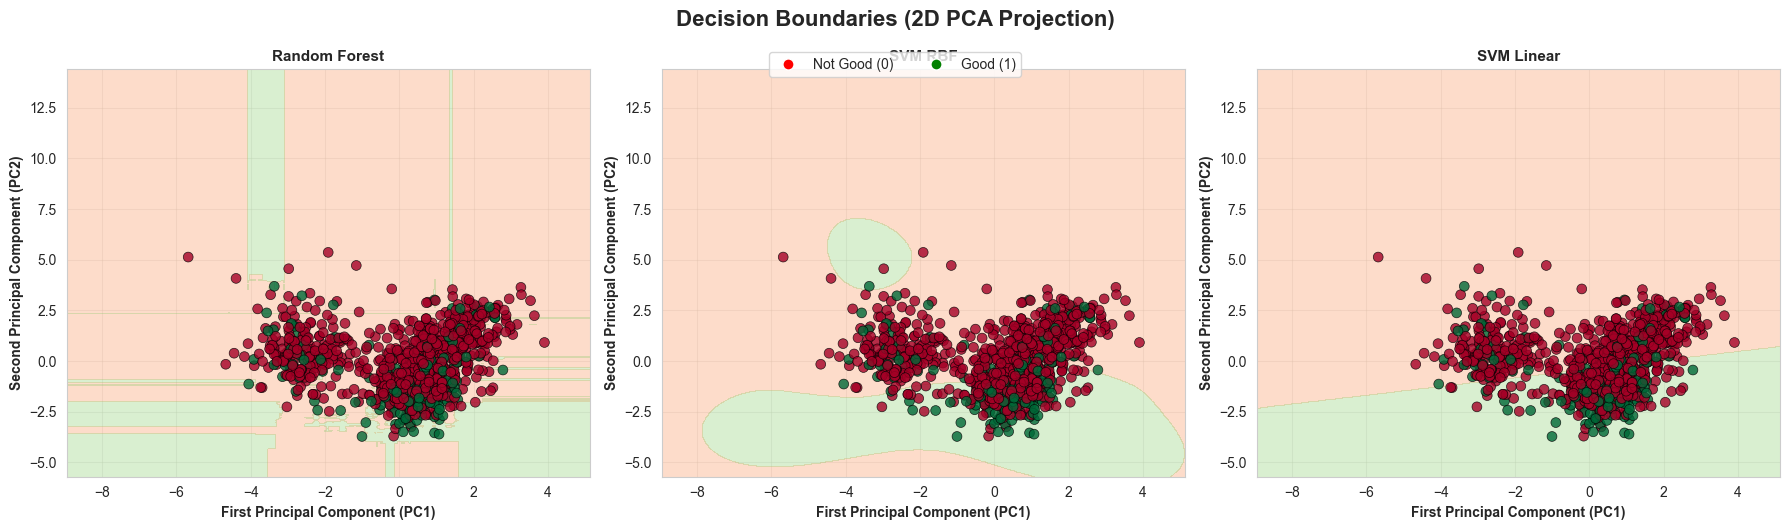

PERFORMANCE ON 2D PCA-REDUCED DATA (for reference)
Note: Performance is lower due to dimensionality reduction

Random Forest:
  2D PCA F1 Score: 0.5433 (Original: 0.6196, Loss: 0.0763)
  2D PCA Accuracy: 0.8431
SVM RBF:
  2D PCA F1 Score: 0.4554 (Original: 0.6205, Loss: 0.1651)
  2D PCA Accuracy: 0.7056
SVM Linear:
  2D PCA F1 Score: 0.4320 (Original: 0.5123, Loss: 0.0803)
  2D PCA Accuracy: 0.6574



In [34]:
# plot decision boundaries for top 3 models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# create mesh grid for decision boundary
h = 0.02  # step size in mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for idx, (model_name, ax) in enumerate(zip(ranking_df.head(3)['Model'].values, axes)):
    model_2d = models_2d[model_name]
    
    # predict on mesh grid
    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn', levels=[0, 0.5, 1])
    
    # plot test points
    scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                        c=y_test, cmap='RdYlGn', edgecolors='black', 
                        s=50, alpha=0.8, linewidths=0.5)
    
    ax.set_xlabel('First Principal Component (PC1)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Second Principal Component (PC2)', fontsize=10, fontweight='bold')
    ax.set_title(f'{model_name}', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

# add shared legend
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=8, label='Not Good (0)'),
           plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='green', markersize=8, label='Good (1)')]
fig.legend(handles=handles, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.98))

plt.tight_layout()
plt.suptitle('Decision Boundaries (2D PCA Projection)', fontsize=16, fontweight='bold', y=1.05)
plt.show()

# evaluate models on PCA data to show information loss
print("=" * 80)
print("PERFORMANCE ON 2D PCA-REDUCED DATA (for reference)")
print("=" * 80)
print("Note: Performance is lower due to dimensionality reduction")
print()

for model_name, model_2d in models_2d.items():
    y_test_pred_2d = model_2d.predict(X_test_pca)
    f1_2d = f1_score(y_test, y_test_pred_2d)
    acc_2d = accuracy_score(y_test, y_test_pred_2d)
    
    # original performance
    original_f1 = ranking_df[ranking_df['Model'] == model_name]['Test F1'].values[0]
    
    print(f"{model_name}:")
    print(f"  2D PCA F1 Score: {f1_2d:.4f} (Original: {original_f1:.4f}, Loss: {original_f1 - f1_2d:.4f})")
    print(f"  2D PCA Accuracy: {acc_2d:.4f}")

print("\n" + "=" * 80)